# **INDIAI - ARTIFICIAL INTELLIGENCE PROJECT**


##### **Group :** `Manav THONTIA`     |   `Delfina FERRERI`    |  `Mathis VESCHAMBRE`  |   `Shiva TARDIVEL`

***

# Table of contents

1. [INTRODUCTION](#1.INTRODUCTION)

2. [DATA PREPROCESSING](#2-data-preprocessing)

    &nbsp;&nbsp;2.1 [Dataset Loading](#3-loading-the-datasets)

    &nbsp;&nbsp;2.2 [Before Merging](#4-before-merging-all-in-one)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 [General Data](#4-general-data)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1.1 [Dropping Unnecessary Attributes](#7-dropping-unnecesary-attributes)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2 [Survey Data Employee and Manager](#5-survey-data-employee-and-manager)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3 [Schedule Data In and Out Times](#6-schedule-data-in-and-out-times)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3.1 [Dropping Unnecessary Attributes](#7-dropping-unnecesary-attributes)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3.2 [Treatment of Missing Values](#8-treatment-of-missing-values)

    &nbsp;&nbsp;2.3 [Merging All into One Dataset](#9-merging-all-into-one-dataset)

    &nbsp;&nbsp;2.4 [After Merging](#9-merging-all-into-one-dataset)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1 [Treatment of missing values](#10-treatment-of-missing-values-after-merging)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1.1 [Ethical Dilema](#11-ethical-dilema)
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1.2 [Non-Subjective Attributes](#11-ethical-dilema)
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1.3 [Subjective Attributes](#11-ethical-dilema)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.2 [Treatment of Outliers](#12-treatment-of-outliers)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.3 [Treatment of categorical Values](#13-treatment-of-categorical-values)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.4 [Feature Selection](#14-feature-selection)

3. [PREDICTING ATTRITION](#15-predicting-attrition)

    &nbsp;&nbsp;3.1 [Support Vector Classifier (SVC)]() 

    &nbsp;&nbsp;3.2 [Logistic Regression]()

    &nbsp;&nbsp;3.1 [Random Forest Classifier]()  

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.1 [Optimizations](#16-optimizations)

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.2 [Fine Tuning](#18-fine-tuned-random-forest-model)

4. [CONCLUSION]()

5. [BIBLIOGRAPHY](#19-bibliography)

___
# 1. INTRODUCTION

- **Context of the Project**  
  This project focuses on analyzing employee turnover at HumanForYou, a pharmaceutical company in India, which faces a 15% annual attrition rate. This turnover impacts project timelines, HR workloads, and employee training efficiency.

- **Goal**  
  The aim is to identify factors influencing employee resignation and develop models to predict and reduce turnover.

- **Datasets Used**  
  We will work with five datasets in CSV format:
  1. `general_data.csv`: Employee demographics, salary, and job details.
  2. `manager_survey_data.csv`: Ratings of performance and job involvement.
  3. `employee_survey_data.csv`: Employee satisfaction survey results.
  4. `in_out_time.zip`: Work hours based on check-in/check-out data.

- **Project Stages**  
  1. Data cleaning and preparation.  
  2. Exploratory Data Analysis (EDA).  
  3. Predictive modeling using machine learning.  
  4. Interpretation of results and recommendations.


***

# 2. DATA PREPROCESSING

### General Steps
The preprocessing phase ensures the data is clean and ready for analysis. Key steps include handling missing values, dealing with outliers, encoding categorical variables, selecting relevant features, and normalizing the data.

### Setting the Environment
We will use the following Python libraries:
- **pandas**: For data manipulation and cleaning.
- **numpy**: For numerical computations.
- **matplotlib & seaborn**: For data visualization.
- **scikit-learn**: For encoding, normalization, and feature selection.

### Steps to Follow
1. **Attribute Creation and Dropping**:
   - Create new attributes responsibly, ensuring they are meaningful and ethical.
   - Drop irrelevant or sensitive attributes (EmployeeID post-merge, redundant and/or low-variance attributes, etc.).

2. **Merging Data**:
   - Combine all datasets based on the shared key (_EmployeeID_) while ensuring no duplicates or mismatches.
   - Avoid leaks of sensitive data during the merge.

3. **Initial Exploratory Data Analysis (EDA)**:
   - Explore the data and document findings on potential ethical issues, such as data imbalances.

4. **Treatment of Missing Values**:
   - Handle missing data using fair imputation techniques instead of assumptions that might favor one group.
   - Deal with ethical dilema that raises from imputing subjective features.

5. **Treatment of Outliers**:
   - Identify and decide on outlier treatment methods carefully to avoid unfairly dismissing data from underrepresented groups.

6. **Encoding Categorical Variables**:
   - Use encoding methods that preserve data fairness, avoiding arbitrary ordinal encoding.

7. **Feature Selection**:
   - Use unbiased statistical and machine learning methods to select features, ensuring key factors are not excluded due to inherent bias.

8. **Normalization**:
   - Standardize numerical variables to prevent features with larger scales from dominating the models unfairly.


In [1693]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os as os

## 2.1. Loading the datasets

In [1694]:
# Get the current working directory
current_directory = os.getcwd()
#os.chdir("Documents/defli's code/project2/INDIAI")
#print("Current Directory:", current_directory)

os.chdir("./Datasets")

general_data = pd.read_csv('general_data.csv').copy()
employee_survey_data = pd.read_csv('employee_survey_data.csv').copy()
manager_survey_data = pd.read_csv('manager_survey_data.csv').copy()
in_time = pd.read_csv('in_time.csv').copy()
out_time = pd.read_csv('out_time.csv').copy()

os.chdir("..")

The datasets will be processed separately, then once clean they will be merged into one.

## 4. Before merging all in one

### General Data

In [1695]:
general_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 24 entries, Age to YearsWithCurrManager
dtypes: float64(2), int64(14), object(8)
memory usage: 827.0+ KB


**Key Observations from the Data Collected So Far:**

- The dataset includes information from **4,410 employees**.
- Out of the total attributes, **14 are numerical**, accepting either integers or floats as their values.
- The remaining **5 attributes are categorical**.

Here’s an overview of the general structure of the data:

In [1696]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### Dropping unnecesary attributes

**Initial Observations:**

- The attribute **Over18** appears to be redundant since the more specific attribute **Age** is also included in the dataset.  
- The attribute **EmployeeCount** seems unnecessary, as each row already corresponds to a single employee.  
- Two attributes, **Gender** and **MaritalStatus**, contain sensitive personal information. These are deemed irrelevant for the current analysis and will not be considered further.  

Next, let’s examine the metrics for each numerical attribute.

In [1697]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


- The attributes **EmployeeCount** and **StandardHours** have a standard deviation of **0.0**, indicating that all entries for these attributes share the same value—**1** and **8.0**, respectively. As such, they do not provide any useful information for distinguishing between employees.

These attributes are dropped, reducing the total number of columns from **24** to **19**.

In [1698]:
general_data.drop('Gender', axis=1,inplace=True)
general_data.drop('MaritalStatus', axis=1,inplace=True)
general_data.drop('Over18', axis=1,inplace=True)
general_data.drop('EmployeeCount', axis=1,inplace=True)
general_data.drop('StandardHours', axis=1,inplace=True)
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,23980,0.0,14,1,10.0,2,9,7,8


### 5. Survey Data: Employee and Manager

These datasets capture insights into employees' feelings and performance at work, reflecting both their own perspectives and their managers' assessments. At first glance, all attributes appear potentially relevant to the current analysis.

In [1699]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [1700]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Given their similarity, it seems natural to merge these two into one dataset, using **EmployeeID** as the key attribute.

In [1701]:
survey_data = pd.merge(employee_survey_data,manager_survey_data,on="EmployeeID",how="outer")
survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,3,3
1,2,3.0,2.0,4.0,2,4
2,3,2.0,2.0,1.0,3,3
3,4,4.0,4.0,3.0,2,3
4,5,4.0,1.0,3.0,3,3


In [1702]:
survey_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### 6. Schedule Data: In and Out Times

These datasets provide highly detailed records of employees' entry and exit times over the past **250 weekdays**. 

As the raw data alone is not immediately useful, additional processing is required to derive meaningful insights. Here are some potential new attributes we could extract for each employee:

- **Average hours worked per day**: The mean number of hours worked per day, excluding days when the employee was absent.  
- **Number of absences**: The count of days where no entry or exit times are recorded for the employee.  
- **Schedule inconsistency**: A measure of how much daily working hours vary, calculated as the standard deviation of working hours.

Before proceeding, let’s take a quick look at what the data entails.

In [1703]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [1704]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### 7. Dropping unnecesary attributes

- Certain days have N/A values for all employees, such as the first day of the year and Christmas.

- These non-working days are irrelevant to our analysis, as they do not contribute any distinguishing information about employees.

- We identify these days and drop the corresponding columns from the datasets.

In [1705]:
nonsence_entries_in = pd.DataFrame(in_time.loc[:, in_time.isnull().sum() == len(in_time) ])
print(nonsence_entries_in.shape[1]," days with all null values for time of entrance.")
nonsence_entries_in

12  days with all null values for time of entrance.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1706]:
nonsence_entries_out = pd.DataFrame(out_time.loc[:, in_time.isnull().sum() == len(in_time)])
print(nonsence_entries_out.shape[1]," days with all null values for time of exit.")
nonsence_entries_out

12  days with all null values for time of exit.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Consistency Check:**

An important step is to verify whether the non-workable days are consistent across the datasets. This means ensuring that the entry and exit time data are well-synchronized, with the same dates marked as non-working in both datasets.

In [1707]:
print("The non-workable days in in_data are the same as in out_data?: ",nonsence_entries_in.equals(nonsence_entries_out))

The non-workable days in in_data are the same as in out_data?:  True


In [1708]:
in_time = in_time.drop(columns=nonsence_entries_in.columns)
out_time = out_time.drop(columns=nonsence_entries_out.columns)

By eliminating the non-workable days, we reduced the number of columns with missing values by 12. 

Next, we will examine other instances of missing data to address them appropriately.

#### 8. Treatment of missing values

To efficiently detect missing values, we can create a function that displays their presence across the dataset:

In [1709]:
def DisplayMissingValues(data, data_name):
    
    df = pd.DataFrame(data)

    missing_counts = df.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]
    
    if missing_columns.empty:
        print("[0] No missing values in:",data_name,"\n")
        return
    print(len(missing_columns)," attributes with missing values in: ",data_name)
    print(missing_columns.to_string(),"\n")

In [1710]:
DisplayMissingValues(in_time, "in time")

249  attributes with missing values in:  in time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    2

In [1711]:

DisplayMissingValues(out_time, "out time")

249  attributes with missing values in:  out time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    

Too many missing values!  
A treatment protocol must be chosen.

First, let's verify there are no _inconsistencies_ in the missing values.  

What do we mean by inconsistencies? Days where, for a certain employee, either entry time or exit time is missing, but not both at the same time.  
An occurrence of this kind would be a problem, as it would clearly not make sense for an employee to check in and then never check out, or vice versa.

In [1712]:
null_inconsistency_df = in_time.isnull() ^ out_time.isnull()    # XOR operation for each cell
print("The number of null inconsistencies is: ",(null_inconsistency_df == True).sum().sum())    # Counting inconsistencies

The number of null inconsistencies is:  0


No inconsistencies were found, meaning the entry and exit time data are well synchronized.

For days where both entry and exit times are missing—which, as observed, occurs at least once for each recorded day—it was decided to treat these as absent days, with zero hours of work.

In [1713]:
def hours_since_midnight(input_time):
    return input_time.hour + input_time.minute / 60

In [1714]:
# convert to datetime format
first_column = in_time['Unnamed: 0']
in_time = in_time.apply(pd.to_datetime)
in_time = in_time.applymap(hours_since_midnight) 

# recover the first column
in_time.insert(0,"EmployeeID",first_column)
in_time.pop('Unnamed: 0')

in_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_4543/141373452.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,9.716667,10.133333,9.900000,9.566667,9.850000,10.150000,9.700000,10.216667,10.016667,...,NaN,NaN,9.916667,10.066667,10.233333,10.183333,10.216667,10.050000,9.900000,10.200000
1,2,10.250000,10.350000,NaN,9.750000,10.150000,9.716667,10.000000,10.716667,9.616667,...,9.250000,10.616667,9.816667,10.550000,10.200000,NaN,9.516667,9.916667,10.533333,9.450000
2,3,10.283333,9.833333,10.233333,9.783333,10.050000,10.083333,10.050000,10.350000,9.916667,...,9.883333,10.250000,10.166667,9.733333,10.250000,10.116667,9.700000,9.716667,9.566667,10.466667
3,4,10.083333,9.933333,10.183333,9.616667,10.033333,10.133333,10.216667,9.883333,10.000000,...,9.900000,10.283333,9.966667,10.066667,10.183333,9.716667,9.866667,9.550000,10.300000,10.016667
4,5,10.466667,9.816667,9.750000,9.816667,10.316667,10.000000,10.483333,9.983333,10.100000,...,9.766667,9.966667,10.050000,10.166667,10.216667,9.733333,10.083333,10.500000,9.300000,9.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,9.333333,10.283333,10.433333,10.100000,9.750000,9.816667,9.616667,9.416667,9.483333,...,10.083333,10.016667,10.416667,10.266667,10.066667,9.750000,10.250000,10.166667,9.466667,10.000000
4406,4407,10.050000,NaN,9.733333,9.700000,10.000000,9.733333,10.116667,10.083333,10.300000,...,9.750000,9.450000,9.683333,9.833333,10.533333,9.783333,9.900000,10.216667,10.350000,10.150000
4407,4408,10.016667,9.550000,9.816667,10.466667,9.783333,10.016667,9.816667,9.783333,10.133333,...,10.016667,10.000000,9.850000,10.033333,9.966667,9.933333,9.983333,NaN,10.033333,10.050000
4408,4409,10.283333,10.033333,10.200000,10.200000,9.700000,NaN,10.000000,9.800000,9.066667,...,9.850000,9.900000,10.016667,10.166667,9.700000,9.933333,9.916667,9.900000,10.250000,9.933333


In [1715]:
first_column = out_time['Unnamed: 0']
out_time = out_time.apply(pd.to_datetime)
out_time = out_time.applymap(hours_since_midnight) 

out_time.insert(0,"EmployeeID",first_column)
out_time.pop('Unnamed: 0')

out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_4543/382984850.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,NaN,NaN,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,NaN,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,NaN,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,NaN,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,NaN,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,NaN,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


In [1716]:
def nan_to_zero(value):
    if pd.isna(value):
        value = 0
    return value

In [1717]:
in_time = in_time.applymap(nan_to_zero)
in_time

out_time = out_time.applymap(nan_to_zero)
out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_4543/51485806.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(nan_to_zero)
/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_4543/51485806.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(nan_to_zero)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,0.000000,0.000000,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,0.000000,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,0.000000,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,0.000000,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,0.000000,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,0.000000,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


In [1718]:
DisplayMissingValues(in_time,"in time")
DisplayMissingValues(out_time,"out time")

[0] No missing values in: in time 

[0] No missing values in: out time 



No missing values remain, as all occurrences of **NaN** were successfully replaced with **zero**.  

Next, the two datasets will be combined into a single dataset containing the previously mentioned attributes, using **EmployeeID** as the key.

In [1719]:

time_data = pd.DataFrame(index=in_time.index, columns=['EmployeeID','AvgWorkedHours','ScheduleInconsistency','Absences'])

# Function to calculate mean time in hours
def calculate_working_hours(e_id,row_in,row_out):

    working_hours_for_employee = []
    absence_counter = 0
    for index in range(1,len(in_time.columns)):    # Skipping EmployeeID column
        check_in = row_in.iloc[index]
        check_out = row_out.iloc[index]
        hours_worked = (check_out - check_in)
        if (hours_worked == 0):
            absence_counter+=1
        else:
            working_hours_for_employee.append(hours_worked)
    mean_time = np.mean(working_hours_for_employee)
    std = np.std(working_hours_for_employee)
    return e_id+1, mean_time, std, absence_counter



# Add new attributes
for i in range(0,len(in_time)):
    row_in = in_time.iloc[i]
    row_out = out_time.iloc[i]

    # Call the function and unpack the results
    e_id, mean_time, schedule_inconsistency, absence_counter = calculate_working_hours(i, row_in, row_out)
    
    # Assign the results to the new DataFrame 'time_data'
    pos = i
    time_data.at[pos, 'EmployeeID'] = e_id
    time_data.at[pos, 'AvgWorkedHours'] = mean_time
    time_data.at[pos, 'ScheduleInconsistency'] = schedule_inconsistency
    time_data.at[pos, 'Absences'] = absence_counter


In [1720]:
time_data.head()

,EmployeeID,AvgWorkedHours,ScheduleInconsistency,Absences
0,1,7.374138,0.281756,17
1,2,7.717726,0.312333,13
2,3,7.013499,0.310978,7
3,4,7.193475,0.283085,14
4,5,8.006259,0.30018,4


In [1721]:
time_data['AvgWorkedHours'] = pd.to_numeric(time_data['AvgWorkedHours'], errors='coerce')
time_data['ScheduleInconsistency'] = pd.to_numeric(time_data['ScheduleInconsistency'], errors='coerce')
time_data['Absences'] = pd.to_numeric(time_data['Absences'], errors='coerce')
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             4410 non-null   object 
 1   AvgWorkedHours         4410 non-null   float64
 2   ScheduleInconsistency  4410 non-null   float64
 3   Absences               4410 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 137.9+ KB


In [1722]:
def DisplayMetricsForAttribute(data,attribute):
    print()
    print("Metrics for",attribute)
    print("MIN: ",data[attribute].min())
    print("MAX: ",data[attribute].max())
    print("AVG: ",data[attribute].mean())
    print("STD: ",data[attribute].std())

In [1723]:
DisplayMetricsForAttribute(time_data,"AvgWorkedHours")
DisplayMetricsForAttribute(time_data,"ScheduleInconsistency")
DisplayMetricsForAttribute(time_data,"Absences")


Metrics for AvgWorkedHours
MIN:  5.950881057268722
MAX:  11.031410256410256
AVG:  7.7007848362385385
STD:  1.3402092792425777

Metrics for ScheduleInconsistency
MIN:  0.2543823008140383
MAX:  0.343310080526662
AVG:  0.29901643922321497
STD:  0.013692602355601673

Metrics for Absences
MIN:  1
MAX:  24
AVG:  12.73469387755102
STD:  5.503779023726599


After successfully extracting the three desired attributes from the time data, the next step is to combine all available information into a comprehensive dataset, which will be named **merged_data**.

## 9. Merging all into one dataset

In [1724]:
merge_key = "EmployeeID"
merged_data = pd.merge(general_data, survey_data, on=merge_key, how="outer")
merged_data = pd.merge(merged_data, time_data, on=merge_key, how="outer")       # time data is missing

# we rearrange the order of the columns for an easier read
columns_order = ["EmployeeID"] + ["Attrition"] + [col for col in merged_data.columns if (col != "EmployeeID" and col != "Attrition")] 
merged_df = merged_data[columns_order]
merged_df.to_csv("merged_data.csv", index=True)
merged_df


,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkedHours,ScheduleInconsistency,Absences
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,...,0,0,3.0,4.0,2.0,3,3,7.374138,0.281756,17
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,...,1,4,3.0,2.0,4.0,2,4,7.717726,0.312333,13
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,...,0,3,2.0,2.0,1.0,3,3,7.013499,0.310978,7
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,...,7,5,4.0,4.0,3.0,2,3,7.193475,0.283085,14
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,...,0,4,4.0,1.0,3.0,3,3,8.006259,0.300180,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,No,42,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,...,0,2,4.0,1.0,3.0,3,3,8.522222,0.300396,6
4406,4407,No,29,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,...,0,2,4.0,4.0,3.0,2,3,6.093084,0.279036,8
4407,4408,No,25,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,...,1,2,1.0,3.0,3.0,3,4,7.706926,0.311805,18
4408,4409,No,42,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,...,7,8,4.0,1.0,3.0,2,3,9.492324,0.325315,8


In [1725]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   object 
 1   Attrition                4410 non-null   object 
 2   Age                      4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

## After merging

To summarize, we have successfully preprocessed the datasets individually, removing unnecessary attributes and generating new, more meaningful ones from otherwise complex data—such as the transformations applied to **in_time** and **out_time**.  

With the complete, merged dataset ready, we will now proceed to data visualization. But before proceeding, we convert specific numerical attributes, such as **JobSatisfaction** and **Education**, into categorical data. Then, we separate the attributes into **numerical** and **categorical** groups for easier handling moving forward.

In [1726]:
# We no longer need EmployeeID
merged_df = merged_df.drop(columns=['EmployeeID'])

numerical_to_categorical = ['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating','Education','JobLevel']
for features in numerical_to_categorical:
    merged_df[features] = pd.Categorical(merged_df[features])

numerical_attributes = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_attributes = merged_df.select_dtypes(include=['object','category']).columns.tolist()

We start by examining the correlations among numerical attributes. This helps identify any strong linear relationships that might influence the analysis.

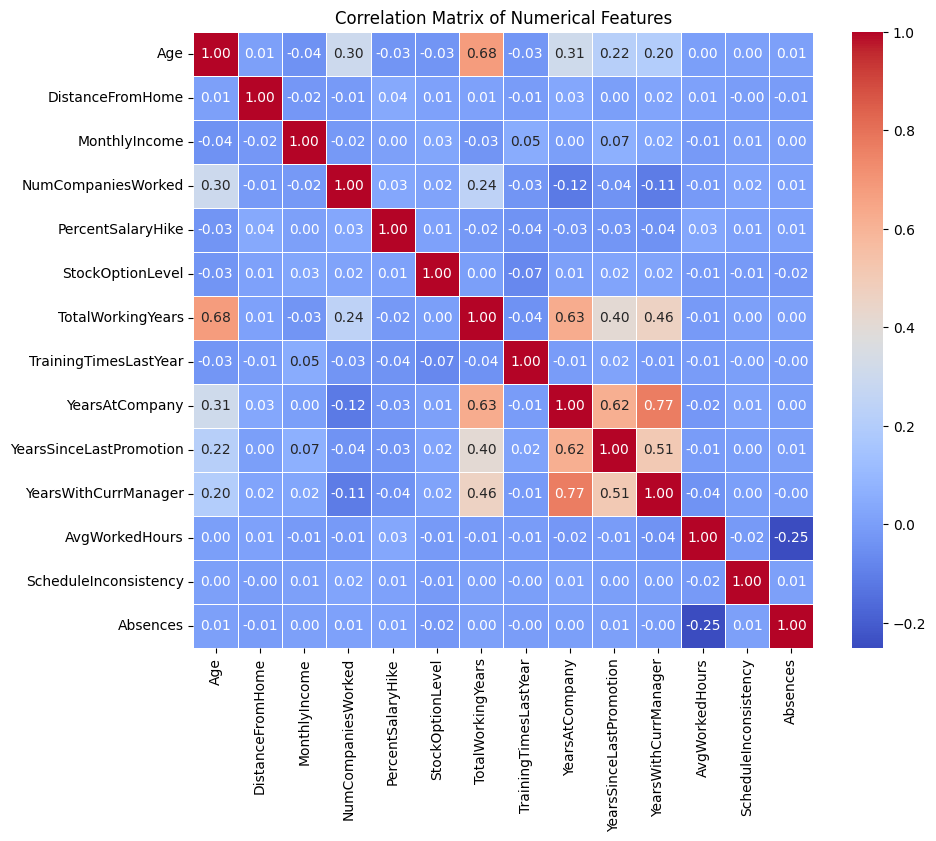

In [1727]:
from scipy.stats import chi2_contingency, pointbiserialr

target = merged_df['Attrition']

# Correlation Matrix for Numerical Features
plt.figure(figsize=(10, 8))
corr_matrix = merged_df[numerical_attributes].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



The highest correlation is 0.77, indicating a strong relationship but not enough to consider the attributes redundant. Both may capture unique aspects of the data, so we retain them for now and assess their importance during modeling.

Before diving into the relationship between Attrition and categorical features, we conduct a Chi² test of independence. This test helps determine whether there is a significant association between the target variable and each categorical feature. Additionally, we visualize the distributions using stacked bar charts for better interpretation.

<Figure size 800x400 with 0 Axes>

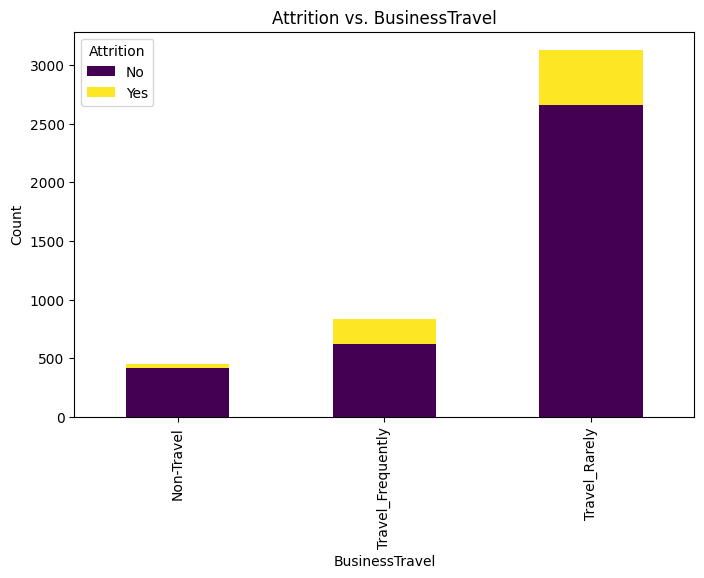

<Figure size 800x400 with 0 Axes>

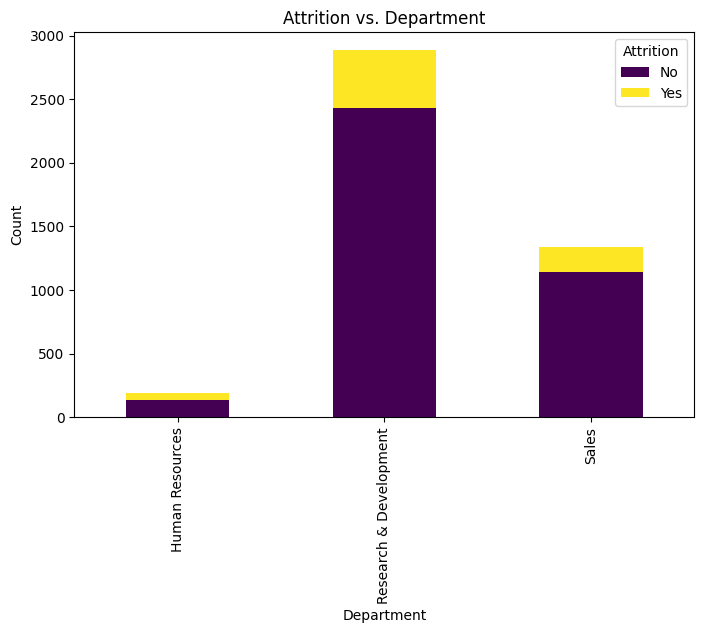

<Figure size 800x400 with 0 Axes>

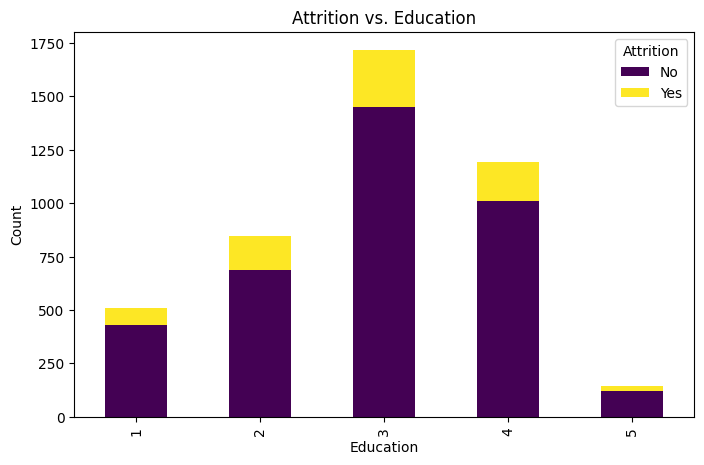

<Figure size 800x400 with 0 Axes>

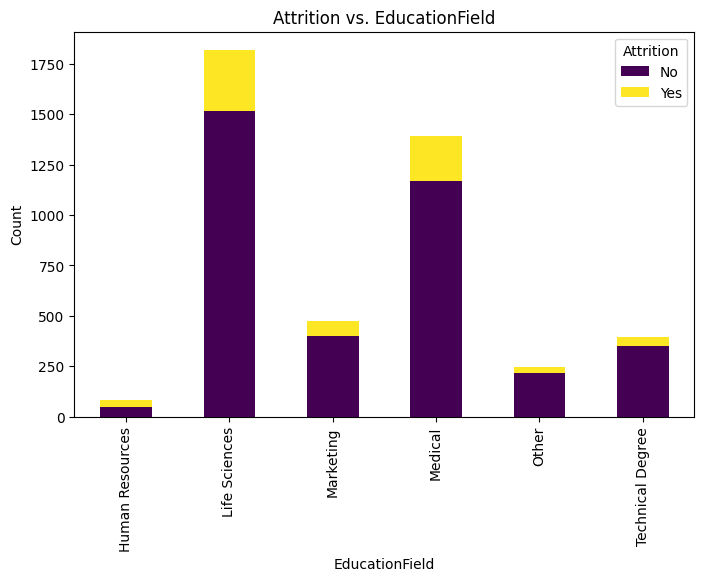

<Figure size 800x400 with 0 Axes>

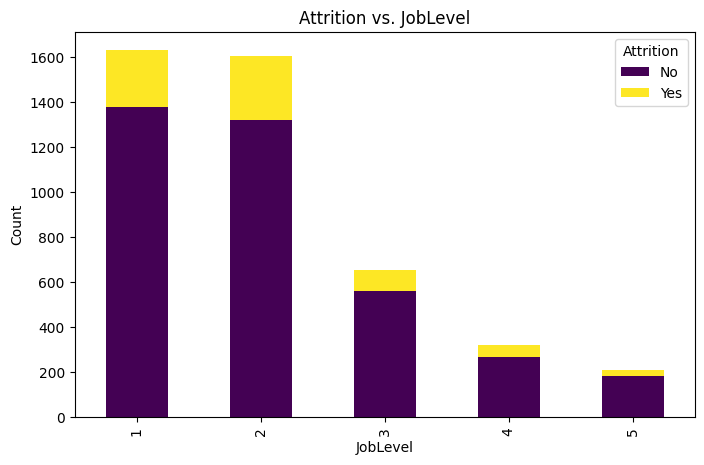

<Figure size 800x400 with 0 Axes>

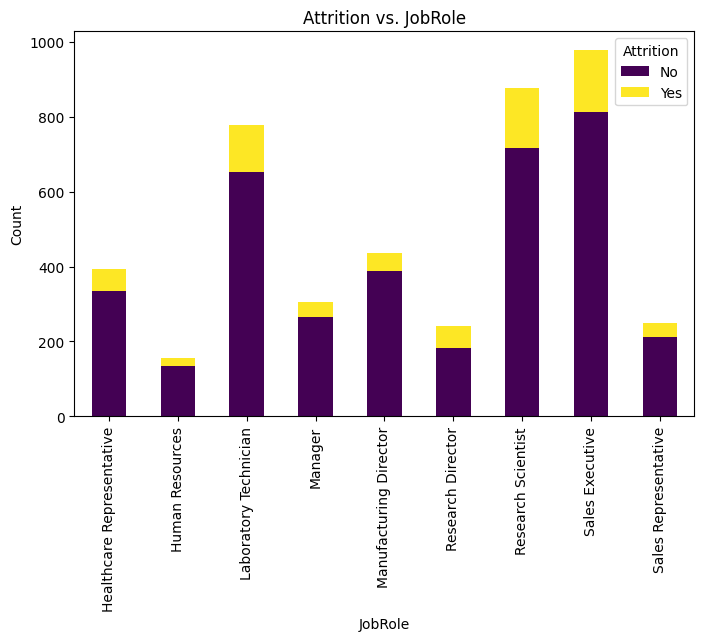

<Figure size 800x400 with 0 Axes>

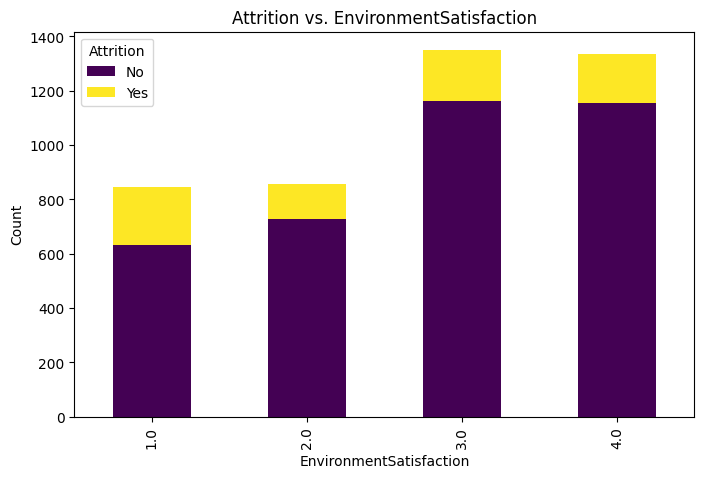

<Figure size 800x400 with 0 Axes>

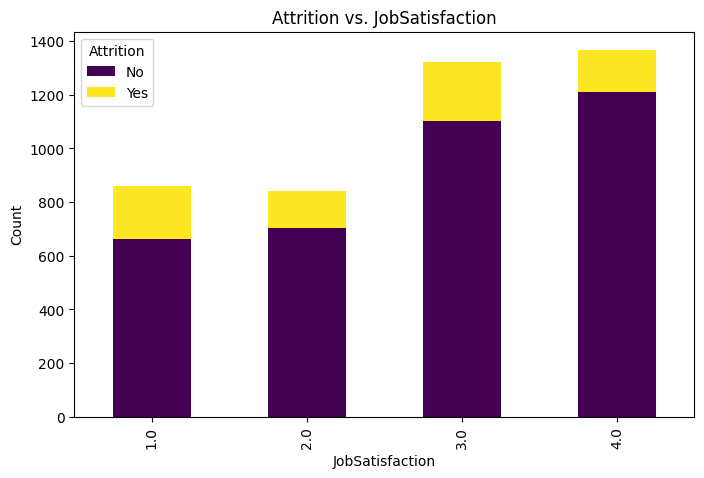

<Figure size 800x400 with 0 Axes>

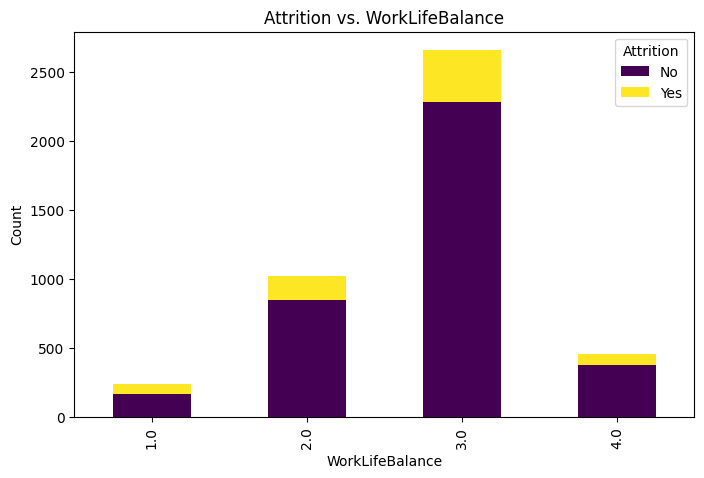

<Figure size 800x400 with 0 Axes>

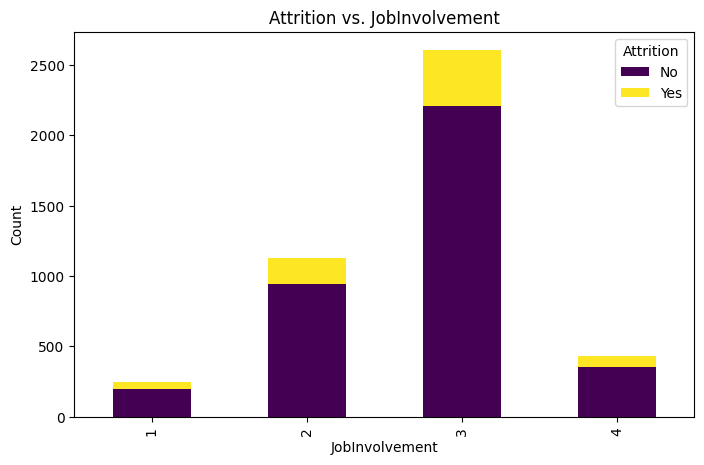

<Figure size 800x400 with 0 Axes>

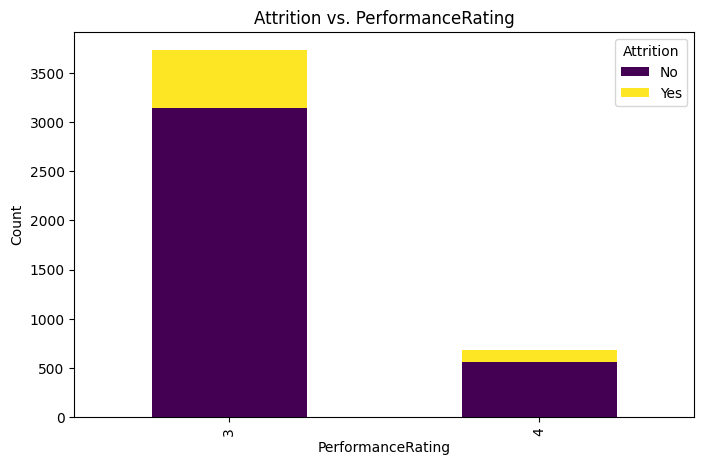

Features not significantly associated with Attrition:
              Feature   p-value
10  PerformanceRating  0.134293
4            JobLevel  0.179928
2           Education  0.227598


In [1728]:

# Attrition vs. categorical features (Chi² test & Crosstab)
chi2_results = {}
for col in categorical_attributes:
    if col != 'Attrition' and col != 'EmployeeID' :  # Skip target itself
        cross_table = pd.crosstab(merged_df[col], merged_df['Attrition'])
        chi2, p, _, _ = chi2_contingency(cross_table)
        chi2_results[col] = p  # Store p-values

        # Crosstab visualization
        plt.figure(figsize=(8, 4))
        cross_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
        plt.title(f"Attrition vs. {col}")
        plt.ylabel("Count")
        plt.show()

# Convert results to DataFrame
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'p-value'])
chi2_df.sort_values(by="p-value", inplace=True)

# Filter features with p-value > 0.05 (not significant)
irrelevant_features = chi2_df[chi2_df['p-value'] > 0.05]
print("Features not significantly associated with Attrition:")
print(irrelevant_features)


The features above are **candidates for deletion** due to their lack of significant association with **Attrition**, suggesting limited predictive value.

In [1729]:
candidates_for_exclusion = ['PerformanceRating','JobLevel','Education']

**From the plots:**  

1. There is a clear **imbalance**, with far more negative than positive **Attrition** cases.  
2. **Patterns** are present but not very distinct, making them harder to interpret.  
3. In some categories, the distributions for positive and negative **Attrition** look quite similar, suggesting limited predictive value.  

We’ve already looked at some plots and shared what we noticed, but we can’t know for sure which features are actually relevant just from those. To dive deeper into the numerical attributes, we’ll use **boxplots** and **density curves** to compare how their values are distributed for both **Attrition** categories. While these graphs won’t provide a definitive answer, they might reveal patterns worth focusing on before moving to classifiers.  

To complement these visualizations, we’ve applied statistical tests specifically for numerical features:  

- **Mann-Whitney U Test**: A non-parametric test that compares whether the distributions of two groups (Attrition: Yes/No) are significantly different.  
- **Cohen’s \(d\)**: A measure of effect size that helps quantify the difference in means between groups, adjusted for standard deviation.  

These tests give us an initial understanding of which attributes might influence attrition the most. However, since missing values, outliers, or unprocessed data could affect the results, these findings are considered preliminary and will be revisited once the data is fully treated.

Numerical Features Impacting Attrition:
                    Feature   Cohen_d
11           AvgWorkedHours  0.535364
3        NumCompaniesWorked  0.111926
4         PercentSalaryHike  0.087347
12    ScheduleInconsistency  0.014082
5          StockOptionLevel -0.018532
1          DistanceFromHome -0.026896
2             MonthlyIncome -0.086453
9   YearsSinceLastPromotion -0.090627
13                 Absences -0.119243
7     TrainingTimesLastYear -0.140203
8            YearsAtCompany -0.371883
0                       Age -0.425616
10     YearsWithCurrManager -0.449086
6         TotalWorkingYears -0.482710


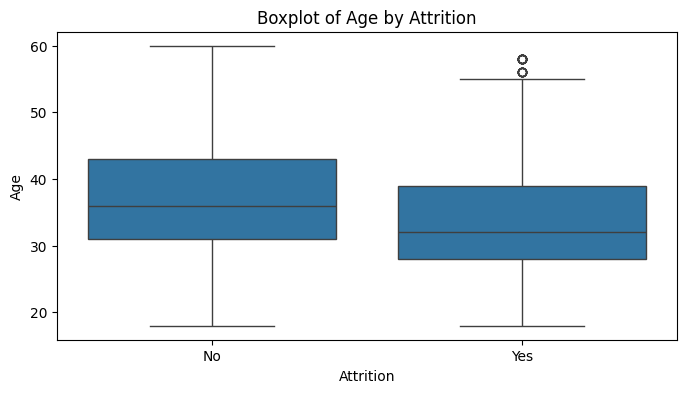

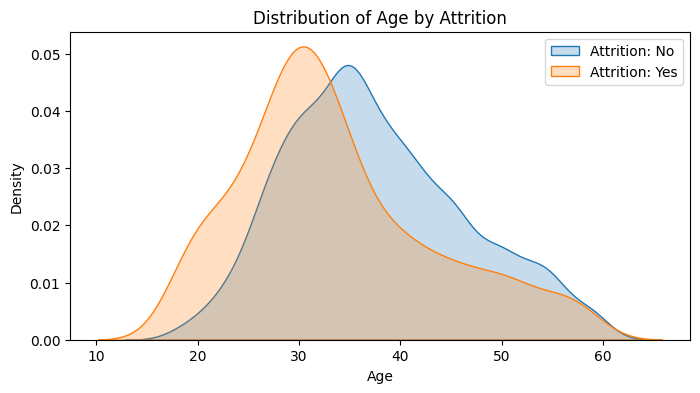

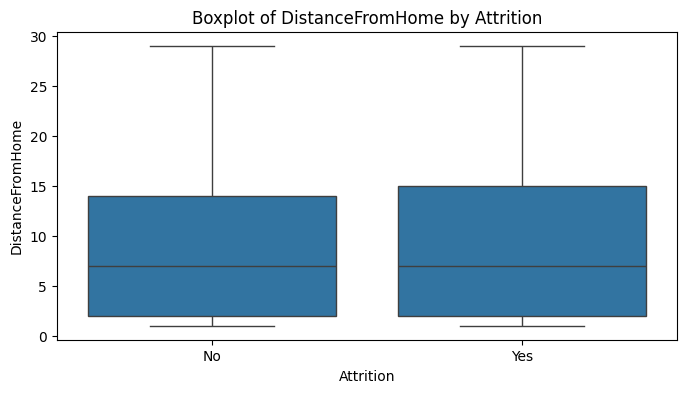

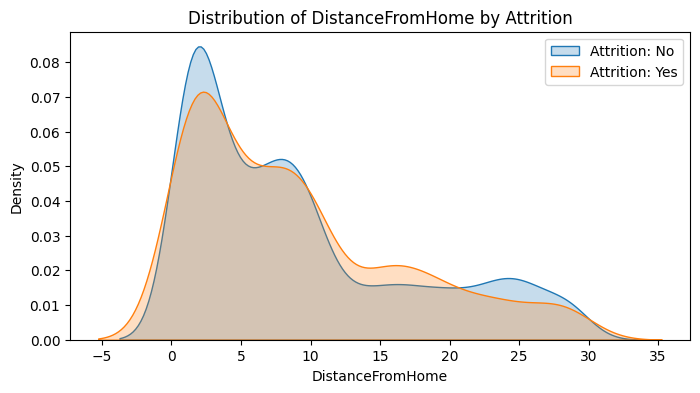

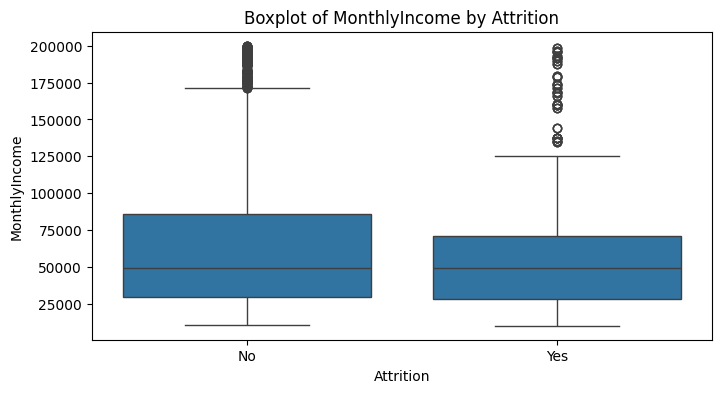

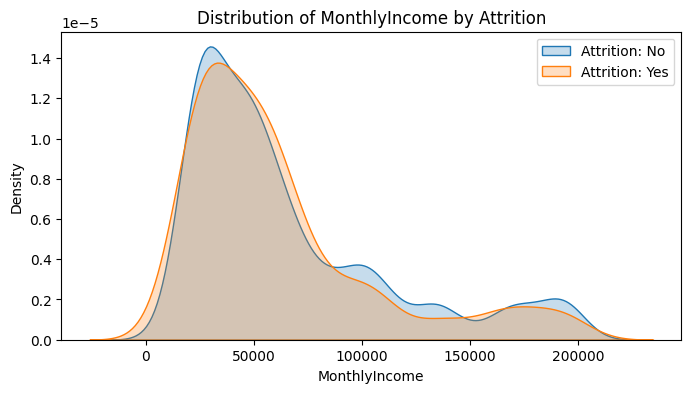

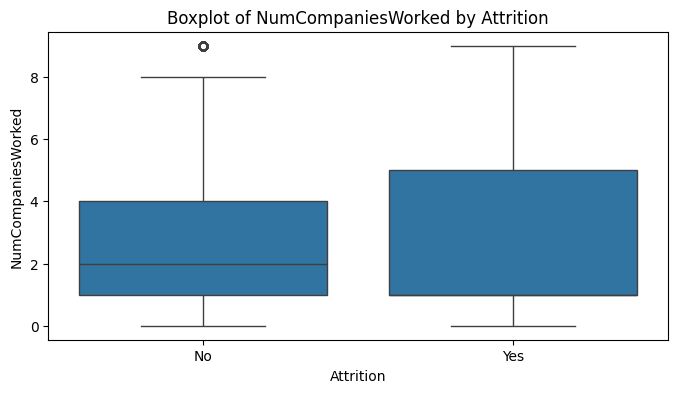

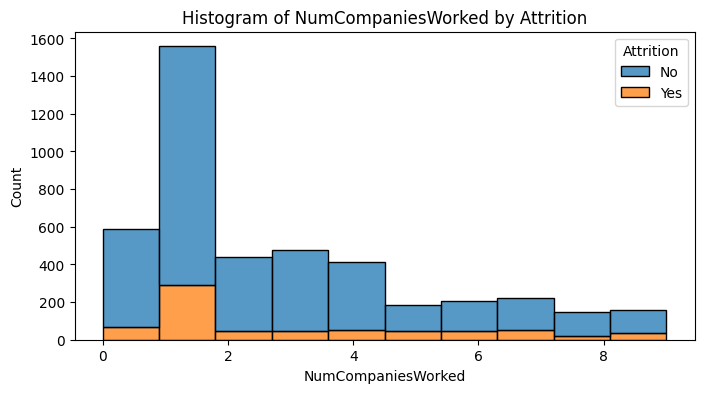

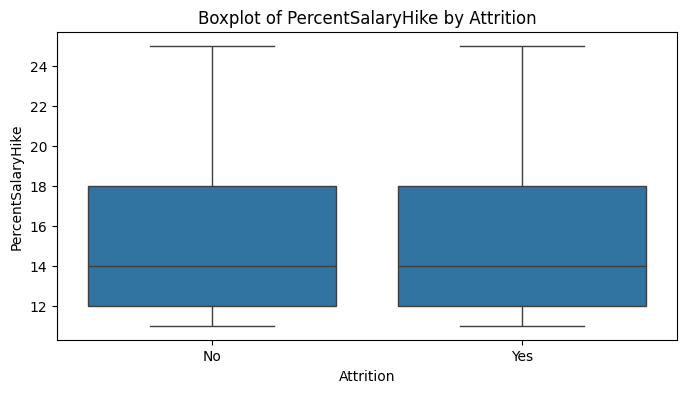

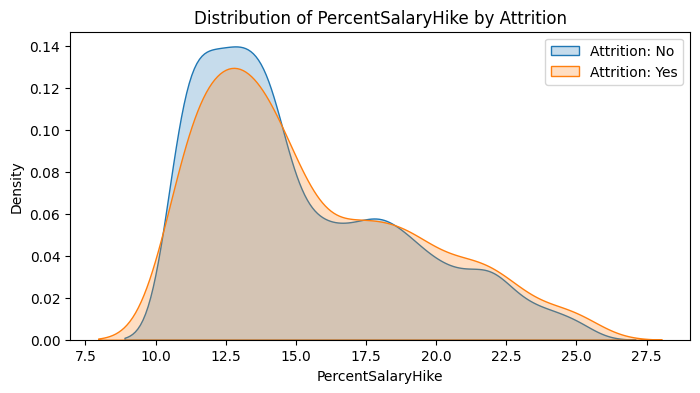

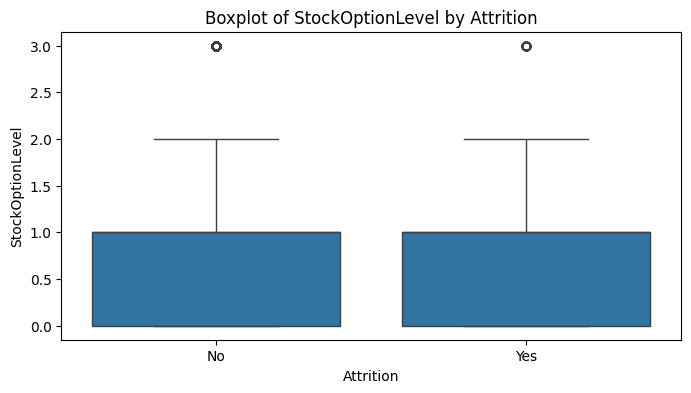

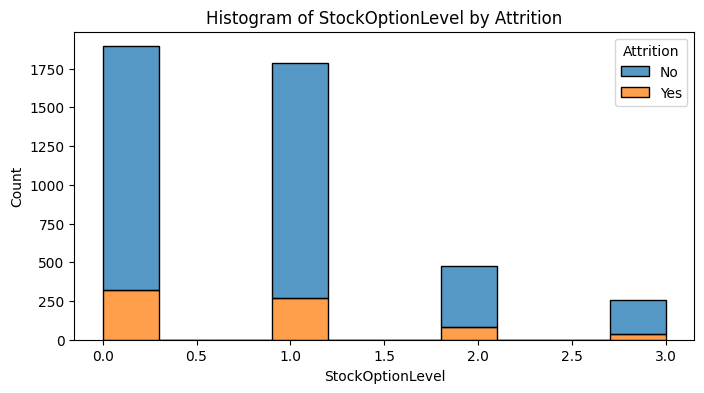

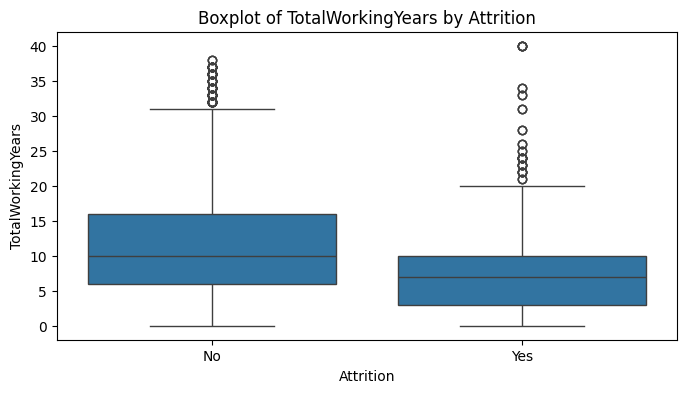

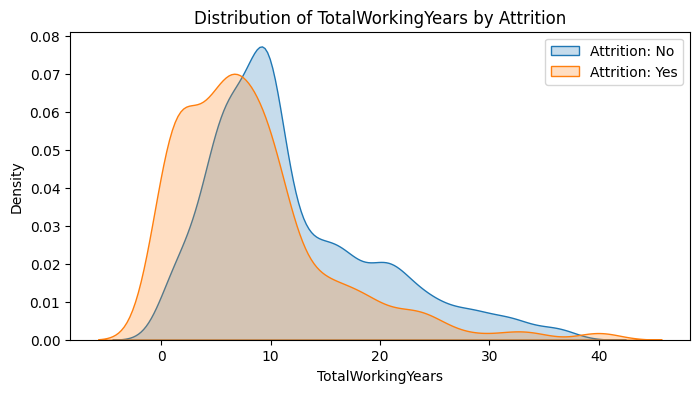

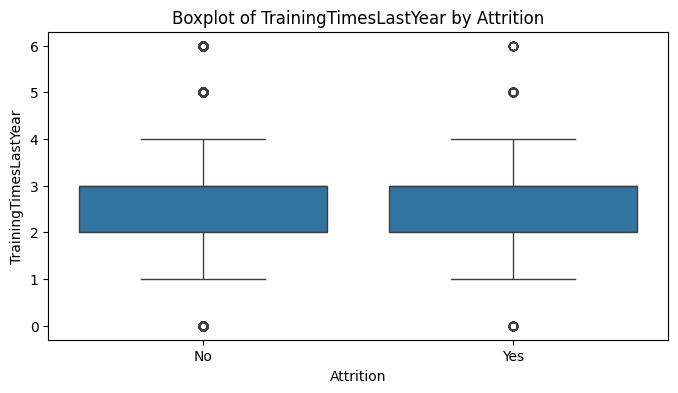

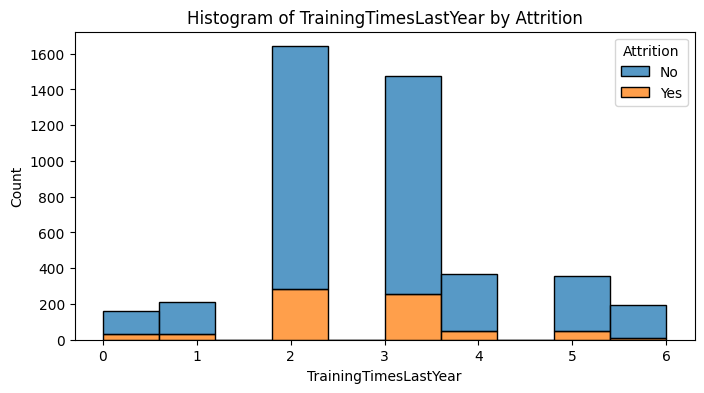

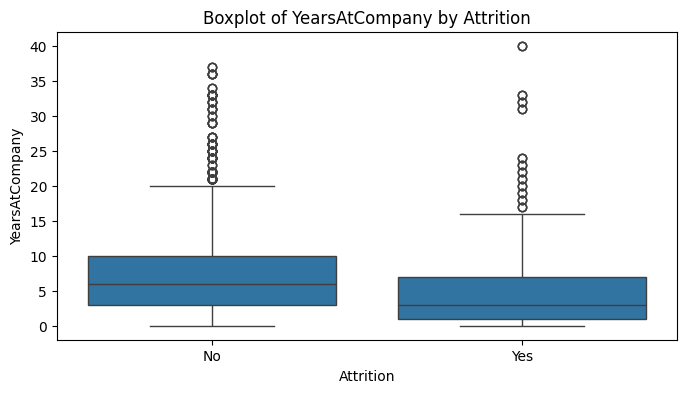

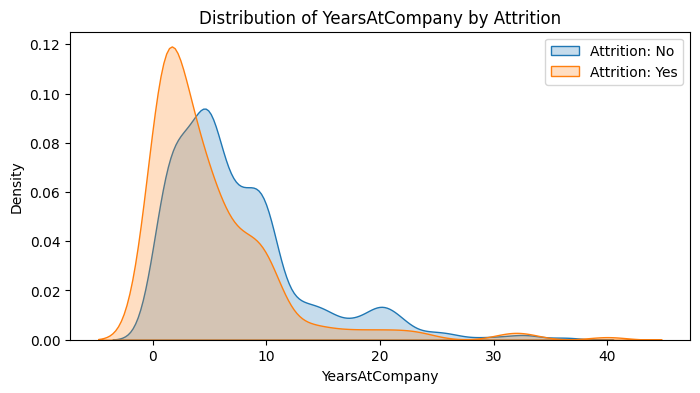

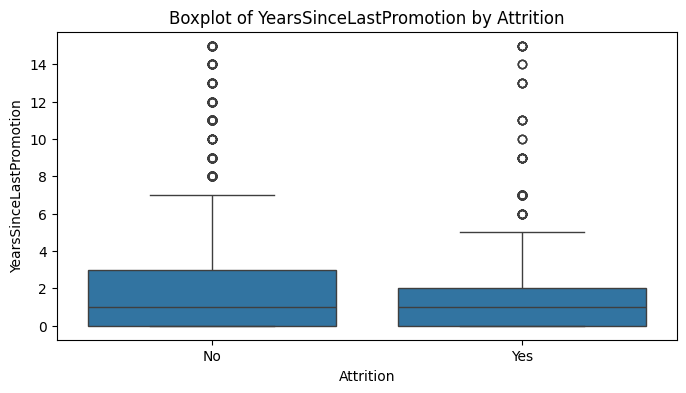

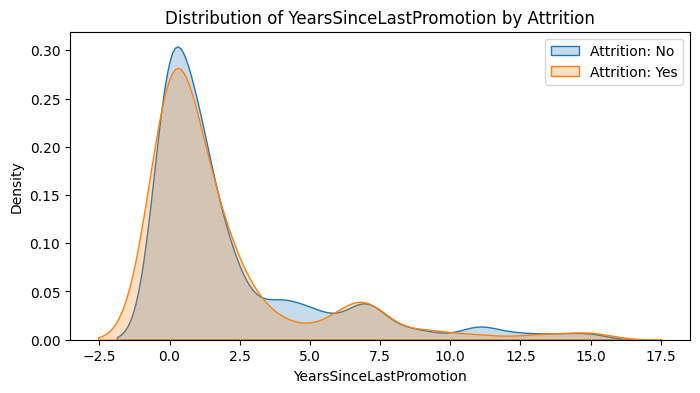

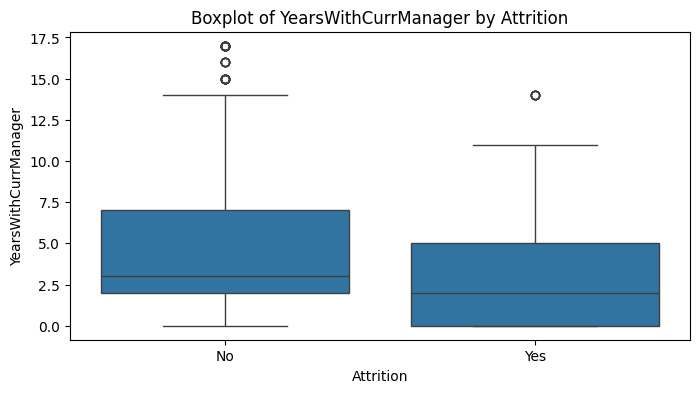

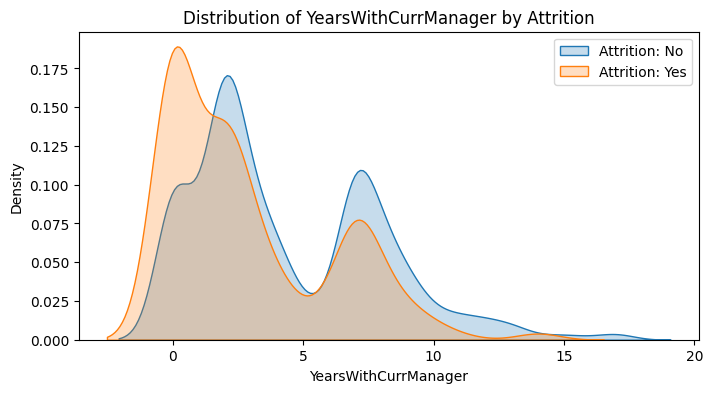

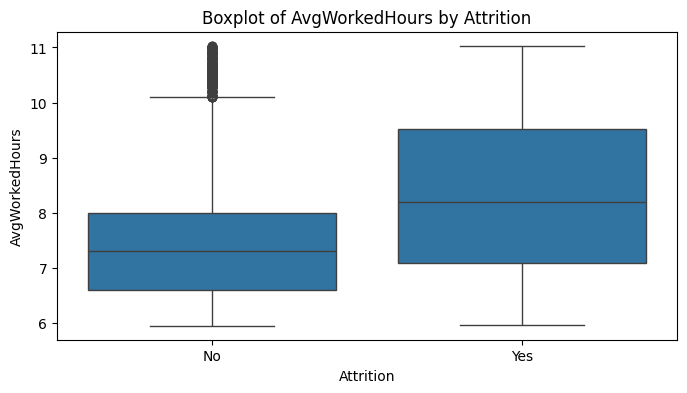

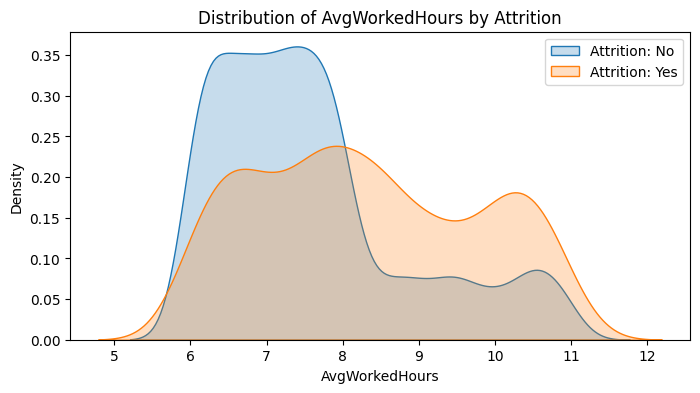

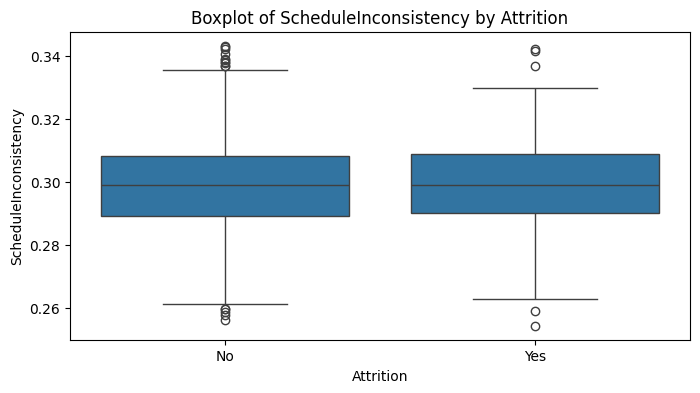

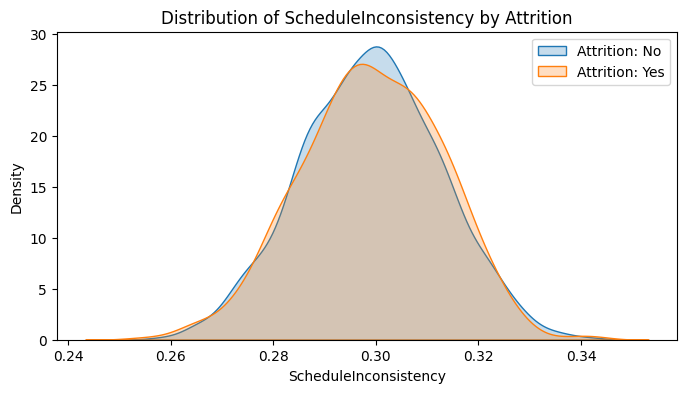

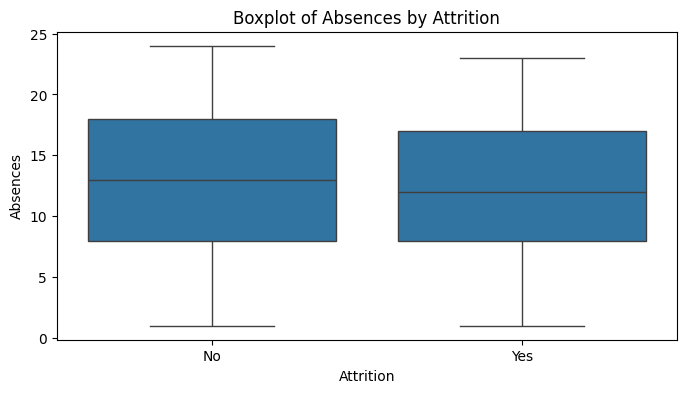

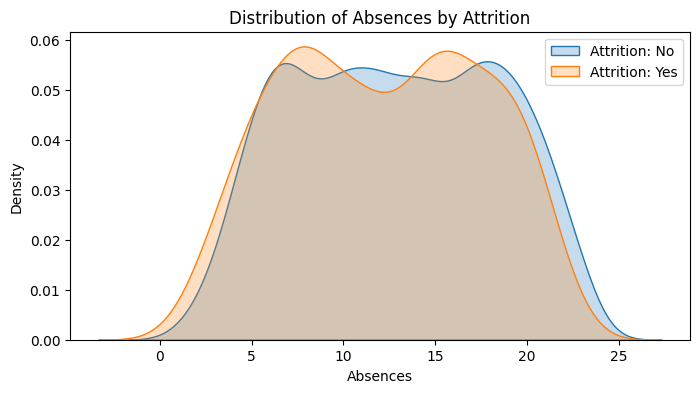

In [1730]:
# Initialize dictionaries for effect sizes
effect_sizes = {}

for col in numerical_attributes:
    group_0 = merged_df[merged_df['Attrition'] == 'No'][col]
    group_1 = merged_df[merged_df['Attrition'] == 'Yes'][col]
    
    # Cohen's d for effect size
    mean_diff = group_1.mean() - group_0.mean()
    pooled_std = np.sqrt((group_0.std()**2 + group_1.std()**2) / 2)
    
    # Handle division by zero
    cohen_d = mean_diff / pooled_std if pooled_std != 0 else 0
    effect_sizes[col] = cohen_d

# Convert results to DataFrame
results_df = pd.DataFrame({'Feature': effect_sizes.keys(), 'Cohen_d': effect_sizes.values()})
results_df.sort_values(by='Cohen_d', ascending=False, inplace=True)

# Display Results
print("Numerical Features Impacting Attrition:")
print(results_df)

# Visualizing Distributions for Each Numerical Feature
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Attrition", y=col, data=merged_df)
    plt.title(f"Boxplot of {col} by Attrition")
    plt.show()

    # Check if the column is continuous or discrete
    if merged_df[col].nunique() > 10:  # Continuous Feature → Use KDE Plot
        plt.figure(figsize=(8, 4))
        sns.kdeplot(merged_df[merged_df['Attrition'] == 'No'][col], label="Attrition: No", fill=True)
        sns.kdeplot(merged_df[merged_df['Attrition'] == 'Yes'][col], label="Attrition: Yes", fill=True)
        plt.title(f"Distribution of {col} by Attrition")
        plt.legend()
        plt.show()
    else:  # Discrete Feature → Use Histogram
        plt.figure(figsize=(8, 4))
        sns.histplot(data=merged_df, x=col, hue="Attrition", multiple="stack", bins=10)
        plt.title(f"Histogram of {col} by Attrition")
        plt.show()

We’ve already identified several numerical attributes that are unlikely to have much impact on the accuracy of the prediction:

- **ScheduleInconsistency**
- **YearsSinceLastPromotion**
- **PercentSalaryHike**
- **MonthlyIncome**
- **Absences**

This selection is based on the similarity observed in boxplots and density curves for both attrition values, indicating little distinction between the groups. Additionally, the **Cohen’s d** values for these attributes are very low, further validating our observation by quantifying their minimal effect size. Together, these insights suggest that these attributes are strong candidates for exclusion as we refine the dataset.

In [1731]:
candidates_for_exclusion.extend(['ScheduleInconsistency','YearsSinceLastPromotion','PercentSalaryHike','MonthlyIncome','Absences'])
len(candidates_for_exclusion)

8

We also notice attributes with a high absolute value of Cohen’s d, showing stronger differences between the two groups (Attrition = Yes vs. No). For instance:

- **AvgWorkedHours** has a Cohen’s d of **0.535**, indicating a noticeable difference between employees who left and those who stayed.  
- **YearsWithCurrManager** and **TotalWorkingYears** have values near \(-0.45\) and \(-0.48\), suggesting employees who stayed tend to have more experience in these areas.

These attributes stand out as potentially important for predicting attrition due to their stronger differences between the groups.

In [1732]:
candidates_for_training = []
candidates_for_training.extend(['AvgWorkedHours','YearsWithCurrManager','TotalWorkingYears'])

### 10. Treatment of missing values after merging

In [1733]:
DisplayMissingValues(merged_df,"data")

5  attributes with missing values in:  data
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38 



#### 11. Ethical Dilema

The attributes with missing values fall into two categories:

Subjective Attributes
These include:
- JobSatisfaction
- EnvironmentSatisfaction
- WorkLifeBalance

Imputing values for these could misrepresent people's opinions, so we aim to avoid it. If necessary, we may leave them as-is or exclude them.

Non-Subjective Attributes
These include:
- TotalWorkingYears
- NumCompaniesWorked

For these, we can confidently use methods like Linear Regression or Random Forest to estimate missing values without ethical concerns.

#### Non-Subjective Attributes: Handling Missing Values  

To handle missing values in non-subjective attributes, we will test and compare different techniques to determine the most effective one:  

1. **Linear Regression**  
2. **KNN (K-Nearest Neighbors)**  
3. **Random Forest Regression**  

- **Linear Regression** is a **univariate** approach. It uses data only from the attribute it aims to infer, completing missing values deterministically. While not strictly a machine learning method, it offers a simple solution.  
- **KNN** and **Random Forest Regression** are **multivariate machine learning** techniques. They utilize multiple attributes to predict missing values, making them more informed and likely to produce accurate results.  

This exploration will ensure we select the best approach to maintain data quality and integrity.

**How to pick the right attributes to train the regression models?**

To train the regression models, we look at the correlation between the target attribute with missing values and the other attributes.

We set a threshold and include only attributes with a correlation outside (-threshold, threshold). This way, we focus on the most relevant attributes to improve model accuracy.

In [1734]:
threshold_TWY = 0.40
threshold_NCW = 0.15

correlations = merged_df.corr(numeric_only=True)
correlations_TWY = correlations['TotalWorkingYears'][(correlations['TotalWorkingYears'] < -threshold_TWY) | (correlations['TotalWorkingYears'] > threshold_TWY)].sort_values(ascending=False)
print(correlations_TWY,"\n")

correlations = merged_df.corr(numeric_only=True)
correlations_NCW = correlations['NumCompaniesWorked'][(correlations['NumCompaniesWorked'] < -threshold_NCW) | (correlations['NumCompaniesWorked'] > threshold_NCW)].sort_values(ascending=False)
print(correlations_NCW)

TotalWorkingYears          1.000000
Age                        0.680661
YearsAtCompany             0.627703
YearsWithCurrManager       0.458800
YearsSinceLastPromotion    0.404444
Name: TotalWorkingYears, dtype: float64 

NumCompaniesWorked    1.000000
Age                   0.299243
TotalWorkingYears     0.238807
Name: NumCompaniesWorked, dtype: float64


In [1735]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_scores = {}

def EvaluateModel(data,attribute,model,model_name,features=None):

    # Separated rows with or not missing values for the attribute
    df_missing = data[data[attribute].isna()].copy()
    df_complete = data.dropna(subset=[attribute]).copy()

    X = df_complete[features]
    y = df_complete[attribute]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Use scaled for the models that need it
    if model_name in ['Ridge Regression', 'Lasso Regression', 'K-Nearest Neighbors', 'Linear Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

    # Calculate error metrics for the test set
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    model_scores[model_name] = r2

    return [mse,rmse,mae,r2], df_missing


In [1736]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=100),
}

results = {}

# Loop through each model, train and evaluate
features = ['Age', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsSinceLastPromotion']
for model_name, model in models.items():
    results_TWY, missing_data_TWY = EvaluateModel(merged_df,'TotalWorkingYears',model,model_name,features)
    results_NCW, missing_data_NCW = EvaluateModel(merged_df,'NumCompaniesWorked',model,model_name,features)
    results[(model_name, 'TotalWorkingYears')] = results_TWY
    results[(model_name, 'NumCompaniesWorked')] = results_NCW
    
# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(
    results, 
    orient='index', 
    columns=['MAE', 'MSE', 'RMSE', 'R²']
)

results_df.index = pd.MultiIndex.from_tuples(results.keys(), names=["Model", "Attribute"])

# Display the DataFrame
results_df.head(10)


MAE       MSE      RMSE  \
Model               Attribute                                           
Linear Regression   TotalWorkingYears   21.233423  4.607974  3.191894   
                    NumCompaniesWorked   5.251583  2.291633  1.800420   
Ridge Regression    TotalWorkingYears   21.233959  4.608032  3.191740   
                    NumCompaniesWorked   5.251636  2.291645  1.800475   
Lasso Regression    TotalWorkingYears   21.265633  4.611468  3.188177   
                    NumCompaniesWorked   5.314212  2.305258  1.829447   
Random Forest       TotalWorkingYears    6.952516  2.636762  1.346966   
                    NumCompaniesWorked   2.243348  1.497781  0.884452   
K-Nearest Neighbors TotalWorkingYears   20.783880  4.558934  2.976254   
                    NumCompaniesWorked   5.267286  2.295057  1.794027   

                                              R²  
Model               Attribute                     
Linear Regression   TotalWorkingYears   0.645580  
                    NumCompaniesWorked  0.157128  
Ridge Regression    TotalWorkingYears   0.645571  
                    NumCompaniesWorked  0.157119  
Lasso Regression    TotalWorkingYears   0.645042  
                    NumCompaniesWorked  0.147076  
Random Forest       TotalWorkingYears   0.883951  
                    NumCompaniesWorked  0.639945  
K-Nearest Neighbors TotalWorkingYears   0.653083  
                    NumCompaniesWorked  0.154607

After implementing and comparing various models through the calculation of different metrics, we use the Coefficient of Determination (R2
 ) as the primary criterion to decide which one is the best. R2
  is unit-independent and essentially tells us how much better (or worse) the model is compared to using the mean of the target variable as a prediction. The ideal model achieves an R2 of 1, indicating a perfect fit.

**Observations**
- Random Forest shows the best performance for both attributes, achieving the lowest MAE, MSE, RMSE, and highest R2.
- Linear, Ridge, and Lasso Regression perform similarly, but their accuracy is significantly lower than Random Forest.
- K-Nearest Neighbors achieves decent results for TotalWorkingYears, but struggles with NumCompaniesWorked.

**Conclusion**

Given these results, Random Forest Regression is the most reliable model for imputing missing values in both attributes due to its accuracy and flexibility.

In [1737]:
# Find the model with the best R² score
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

print(f"\nThe best model is: {best_model_name}.")
# Reset the index to separate Model and Attribute
results_df.index = pd.MultiIndex.from_tuples(results.keys(), names=["Model", "Attribute"])


The best model is: Random Forest.


In [1738]:

# Now use the best model to predict the missing values: TotalWorkingYears

# Fill missing values in df_missing using the best model
X_missing = missing_data_TWY[features]
y_missing_pred = best_model.predict(X_missing)

# Replace missing values in the 'TotalWorkingYears' column with the predicted values
missing_data_TWY['TotalWorkingYears'] = np.round(y_missing_pred)

# Update the original DataFrame with the imputed values
merged_df.loc[merged_df['TotalWorkingYears'].isna(), 'TotalWorkingYears'] = missing_data_TWY['TotalWorkingYears']

In [1739]:
# Now use the best model to predict the missing values: NumCompaniesWorked

# Fill missing values in df_missing using the best model
X_missing = missing_data_NCW[features]
y_missing_pred = best_model.predict(X_missing)

# Replace missing values in the 'TotalWorkingYears' column with the predicted values
missing_data_NCW['NumCompaniesWorked'] = np.round(y_missing_pred)

# Update the original DataFrame with the imputed values
merged_df.loc[merged_df['NumCompaniesWorked'].isna(), 'NumCompaniesWorked'] = missing_data_NCW['NumCompaniesWorked']

In [1740]:
DisplayMissingValues(merged_df,"merged data")

3  attributes with missing values in:  merged data
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38 



The missing values have been succesfully replaced using Random Forest Regression.

Time to move on to subjective attributes.

In [1741]:
non_subjective_attributes = ['TotalWorkingYears','NumCompaniesWorked']

#### Subjective Attributes

For subjective attributes, the discussion focused on avoiding any potential harm that might arise from misinterpreting or misrepresenting employees' opinions. After evaluating the available options, we agreed that the best approach was to drop rows with missing values for the following reasons:
- Avoiding Harm: Using inferred or neutral values could lead to incorrect classifications, potentially impacting decisions about promotions, opportunities, or terminations.
- Ethical Responsibility: It’s not ethical to assume or assign opinions to individuals, as this would misrepresent their perspective.
- Limited Impact: Missing values represent only 1.88% of the data, so the trade-off in accuracy is minimal compared to the potential ethical risk.

The other options considered were:
1. Removing the attributes entirely: This would discard valuable information that could help with predictions.
2. Replacing with neutral values (e.g., 3.0): This assumes neutrality without evidence, which we deemed misleading.

In [1742]:
subjective_attributes = ['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']

In [1743]:
merged_df[subjective_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   JobSatisfaction          4390 non-null   category
 1   EnvironmentSatisfaction  4385 non-null   category
 2   WorkLifeBalance          4372 non-null   category
dtypes: category(3)
memory usage: 13.6 KB


In [1744]:
# 1: droppint missing attributes
missing_values = merged_df[subjective_attributes].isnull().sum().sum()
porcentage_missing_values = (100/len(time_data)*missing_values)
print(missing_values,"is the total number of missing values.")
print(f"That represents {porcentage_missing_values:.2f}% of the data.")
#merge_df.drop(subjective_attributes)

83 is the total number of missing values.
That represents 1.88% of the data.


[1] **Removing the attributes entirely**: This option was dismissed because the percentage of missing values (1.88%) is too small to justify dropping three potentially relevant attributes. Doing so would possibly eliminate valuable information without knowing the correlation of these attributes with the prediction target.

In [1745]:
#2: replacing by neutral value
from sklearn.impute import SimpleImputer

neutral_imputer = SimpleImputer(strategy='constant', fill_value=3.0)
#merged_df[subjective_attributes] = neutral_imputer.fit_transform(merged_df[subjective_attributes])

#DisplayMissingValues(merged_df,"merged data")

[2] **Replacing with neutral values (e.g., 3.0)**: This option might still be considered unethical, as it implies speaking for individuals by assigning them a neutral opinion (3.0) without understanding the context or reasons for their lack of response. While technically feasible, this approach could misrepresent the data and potentially introduce bias.

In [1746]:
# Calculate the number of rows and percentage of data to be dropped
missing_rows_count = merged_df[subjective_attributes].isnull().any(axis=1).sum()
porcentage_missing_rows = (100 / len(merged_df)) * missing_rows_count
print(missing_rows_count, "rows would be dropped.")
print(f"That represents {porcentage_missing_rows:.2f}% of the data.")

# Drop rows with missing values in subjective attributes
merged_df = merged_df.dropna(subset=subjective_attributes)

83 rows would be dropped.
That represents 1.88% of the data.


In [1747]:
DisplayMissingValues(merged_df,"merged")

[0] No missing values in: merged 



**Final Decision**

Rows with missing values in subjective attributes were dropped. This decision prioritizes fairness and avoids any potential harm to individuals, ensuring the model remains ethically sound even at the cost of slight accuracy loss.

### 12. Treatment of outliers

Outliers can affect model accuracy, so we first identify them in numerical attributes. Using the Interquartile Range (IQR) method, we detect values outside the normal range and visualize them with boxplots. Categorical attributes are excluded from this analysis.

The function below counts and displays outliers to guide their treatment.

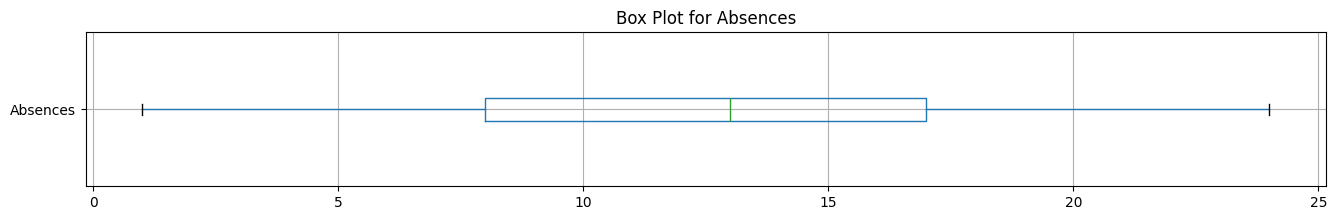

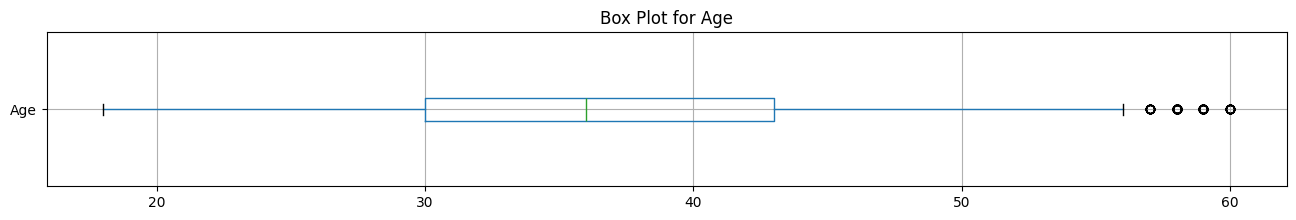

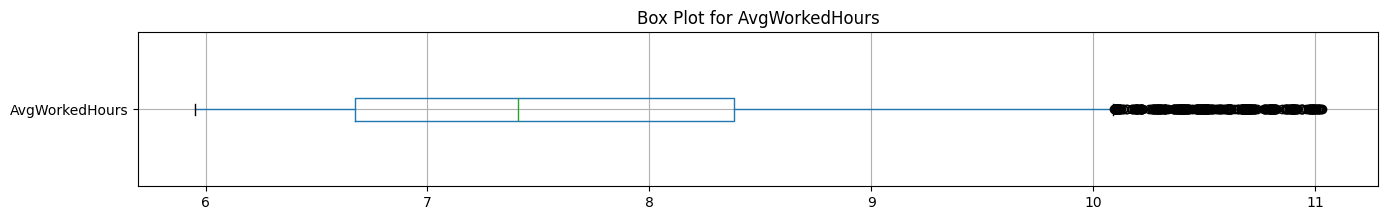

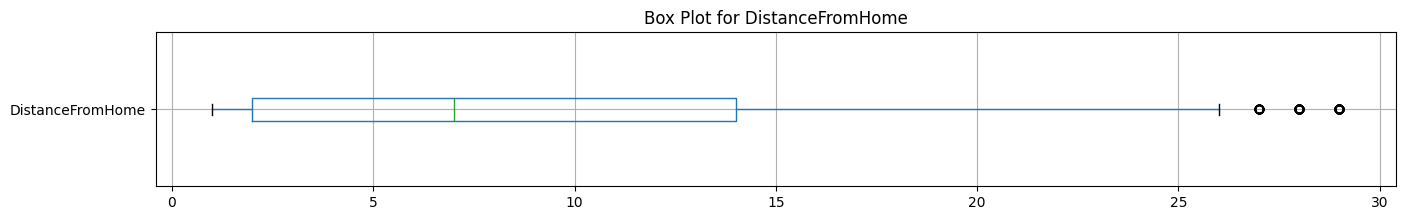

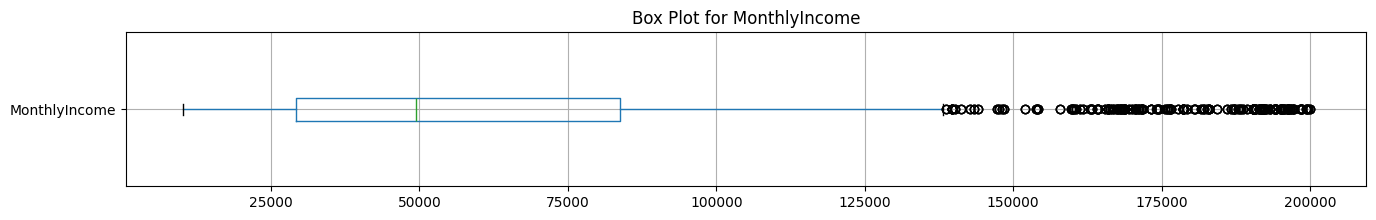

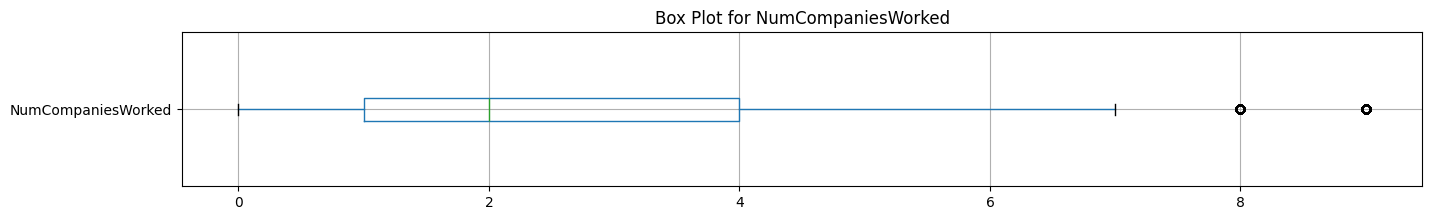

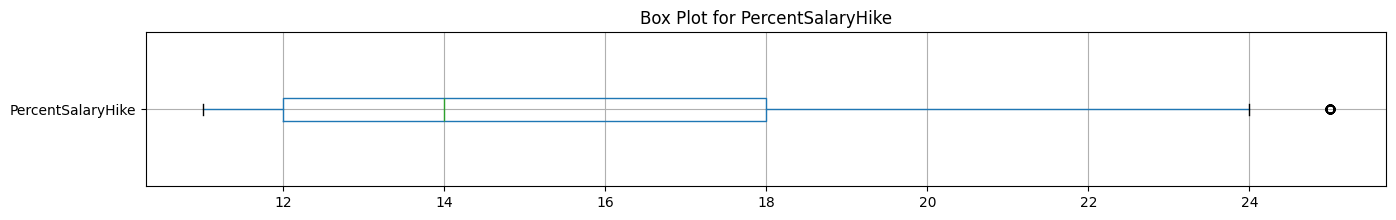

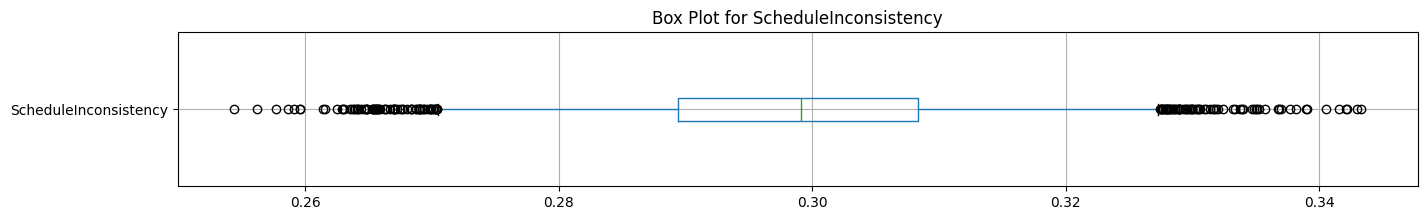

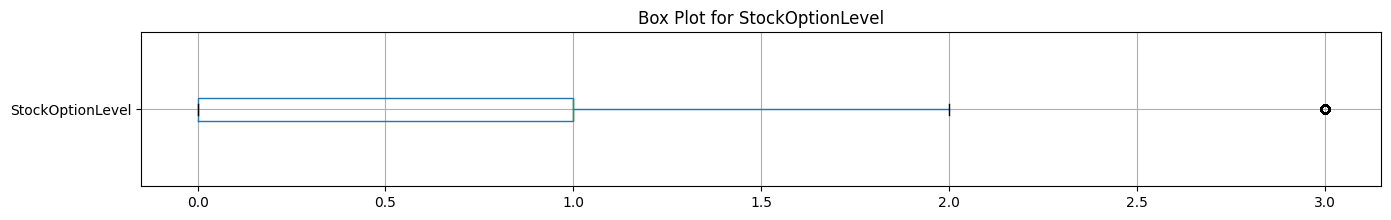

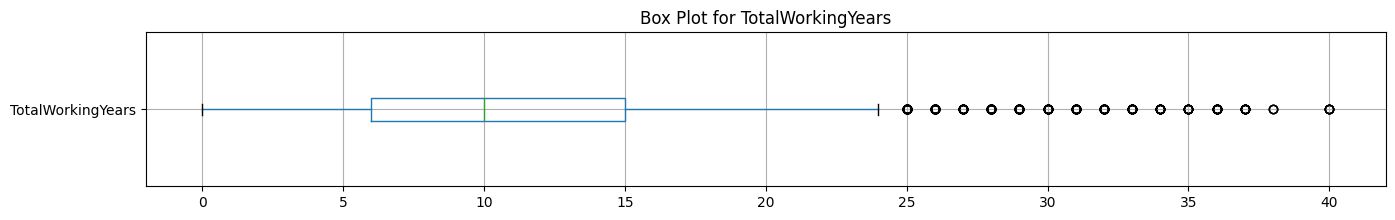

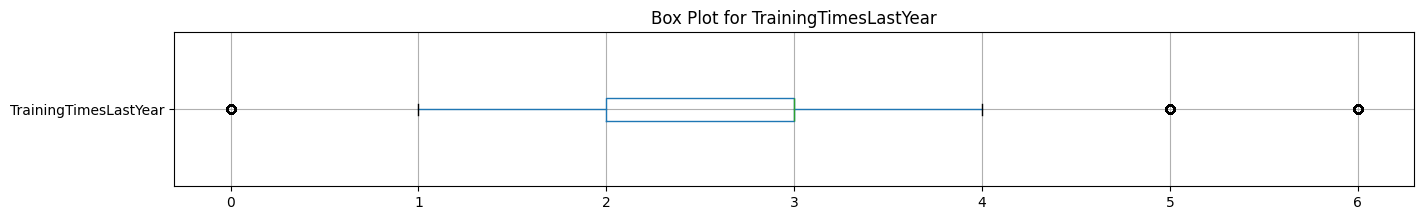

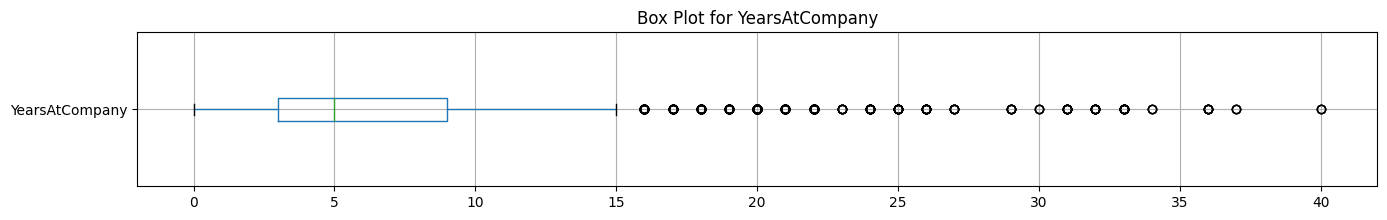

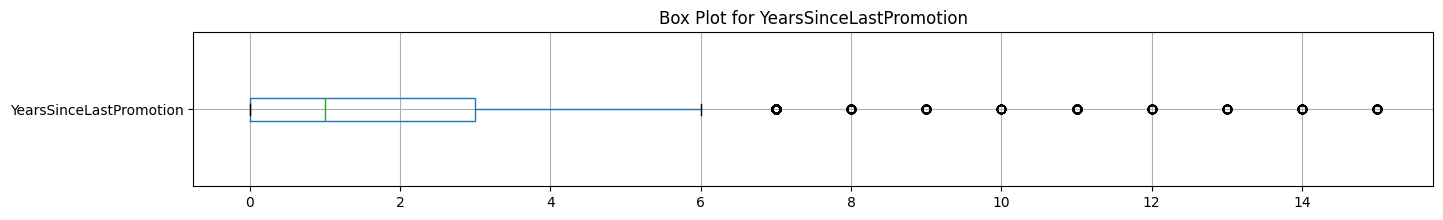

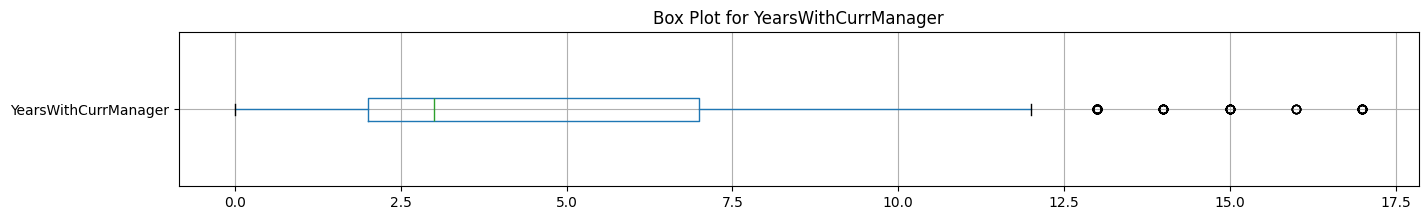

Categorical attributes are excluded from this treatment.
Categorical features ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobLevel', 'JobRole', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

With a threshold value of 1 , the outliers detected are:
Age: 99 outliers (2.29%)
AvgWorkedHours: 406 outliers (9.38%)
DistanceFromHome: 183 outliers (4.23%)
MonthlyIncome: 428 outliers (9.89%)
NumCompaniesWorked: 295 outliers (6.82%)
PercentSalaryHike: 54 outliers (1.25%)
ScheduleInconsistency: 150 outliers (3.47%)
StockOptionLevel: 251 outliers (5.80%)
TotalWorkingYears: 329 outliers (7.60%)
TrainingTimesLastYear: 700 outliers (16.18%)
YearsAtCompany: 408 outliers (9.43%)
YearsSinceLastPromotion: 537 outliers (12.41%)
YearsWithCurrManager: 97 outliers (2.24%)

No outliers in ['Absences']


In [1748]:
def DisplayOutliers(numerical_attributes,categorical_attributes,threshold=1.5):
    numeric_df = merged_df.select_dtypes(include=[np.number])

    # Calculate the IQR for each numeric column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the whiskers
    lower_whisker = Q1 - threshold * IQR
    upper_whisker = Q3 + threshold * IQR

    # Create a box plot for each column and count outliers
    outliers_count = {}

    for column in numeric_df.select_dtypes(include=[np.number]).columns.difference(categorical_attributes):
        plt.figure(figsize=(16, 2))
        numeric_df.boxplot(column=column, vert=False, whis=threshold)
        plt.title(f'Box Plot for {column}')
        plt.show()
        
        # Count outliers
        lower_outliers = (numeric_df[column] < lower_whisker[column]).sum()
        upper_outliers = (numeric_df[column] > upper_whisker[column]).sum()
        outliers_count[column] = lower_outliers + upper_outliers

    # Display the outliers count

    print("Categorical attributes are excluded from this treatment.\nCategorical features",categorical_attributes)
    print("\nWith a threshold value of",threshold,", the outliers detected are:")
    no_outliers = []
    for column, count in outliers_count.items():
        outlier_percentage = (count / numeric_df.shape[0]) * 100
        if (outlier_percentage > 0):
            print(f'{column}: {count} outliers ({outlier_percentage:.2f}%)')
        else:
            no_outliers.append(column)
    print("\nNo outliers in",no_outliers)

DisplayOutliers(numerical_attributes,categorical_attributes,1)

Once the outliers are detected, the next step is to decide how to handle them. The main strategies are:  

1. **Ignore Them**: If the outliers don't significantly affect the analysis or model performance, they can be left as they are.  
2. **Categorize Attributes**: Convert numerical attributes into categories to reduce the influence of extreme values.  
3. **Cap or Floor Values**: Adjust outliers by setting them to the nearest acceptable value (e.g., lower or upper bounds based on the whiskers).  

In [1749]:
DisplayMissingValues(merged_df,"merged data")

[0] No missing values in: merged data 



In [1750]:
# strategy #2

def Years_Cat_transf_value(column):
    bins = [0, 2, 9, 14, 19, 41]
    labels = ['[0-2]', '[3-9]', '[10-14]', '[15-19]', '[20-41]']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)

def Days_Cat_transf_value(column):
    bins = [-1, 0, 2, 4, float('inf')]
    labels = ['0 days', '1-2 days', '3-4 days', '5+ days']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)

def Drop_column(column):
    if column in merged_df.columns:
        merged_df.drop(column, axis=1, inplace=True)
    return merged_df


# strategy #3

def Cap_value(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return column


# For attributes that include years: strategy #3
merged_df['TotalWorkingYears'] = Years_Cat_transf_value(merged_df['TotalWorkingYears'])
merged_df['YearsAtCompany'] = Years_Cat_transf_value(merged_df['YearsAtCompany'])
merged_df['YearsSinceLastPromotion'] = Years_Cat_transf_value(merged_df['YearsSinceLastPromotion'])
merged_df['YearsWithCurrManager'] = Years_Cat_transf_value(merged_df['YearsWithCurrManager'])
# For other attributes: strategies #2 and #3
merged_df['TrainingTimesLastYear'] = Days_Cat_transf_value(merged_df['TrainingTimesLastYear'])
merged_df['MonthlyIncome'] = Cap_value(merged_df['MonthlyIncome'])
merged_df['NumCompaniesWorked'] = Cap_value(merged_df['NumCompaniesWorked'])
merged_df['AvgWorkedHours'] = Cap_value(merged_df['AvgWorkedHours'])
merged_df['ScheduleInconsistency']= Cap_value(merged_df['ScheduleInconsistency'])
merged_df['StockOptionLevel'] = Cap_value(merged_df['StockOptionLevel'])
#merged_df = Drop_column('StockOptionLevel')

In [1751]:
merged_df[['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'MonthlyIncome', 'NumCompaniesWorked']].head()

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,MonthlyIncome,NumCompaniesWorked
0,[0-2],[0-2],[0-2],[0-2],5+ days,131160.0,1.0
1,[3-9],[3-9],[0-2],[3-9],3-4 days,41890.0,0.0
2,[3-9],[3-9],[0-2],[3-9],3-4 days,165622.5,1.0
3,[10-14],[3-9],[3-9],[3-9],5+ days,83210.0,3.0
4,[10-14],[3-9],[0-2],[3-9],3-4 days,23420.0,4.0


In [1752]:
merged_df['Department'].info()


<class 'pandas.core.series.Series'>
Index: 4327 entries, 0 to 4408
Series name: Department
Non-Null Count  Dtype 
--------------  ----- 
4327 non-null   object
dtypes: object(1)
memory usage: 67.6+ KB


In [1753]:
merged_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkedHours,ScheduleInconsistency,Absences
0,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160.0,...,[0-2],[0-2],3.0,4.0,2.0,3,3,7.374138,0.281756,17
1,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890.0,...,[0-2],[3-9],3.0,2.0,4.0,2,4,7.717726,0.312333,13
2,No,32,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,165622.5,...,[0-2],[3-9],2.0,2.0,1.0,3,3,7.013499,0.310978,7
3,No,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210.0,...,[3-9],[3-9],4.0,4.0,3.0,2,3,7.193475,0.283085,14
4,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420.0,...,[0-2],[3-9],4.0,1.0,3.0,3,3,8.006259,0.300180,4


In [1754]:
numerical_attributes = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_attributes = merged_df.select_dtypes(include=['object','category']).columns.tolist()

In [1755]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4327 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Attrition                4327 non-null   object  
 1   Age                      4327 non-null   int64   
 2   BusinessTravel           4327 non-null   object  
 3   Department               4327 non-null   object  
 4   DistanceFromHome         4327 non-null   int64   
 5   Education                4327 non-null   category
 6   EducationField           4327 non-null   object  
 7   JobLevel                 4327 non-null   category
 8   JobRole                  4327 non-null   object  
 9   MonthlyIncome            4327 non-null   float64 
 10  NumCompaniesWorked       4327 non-null   float64 
 11  PercentSalaryHike        4327 non-null   int64   
 12  StockOptionLevel         4327 non-null   float64 
 13  TotalWorkingYears        4327 non-null   category
 14  TrainingTimes

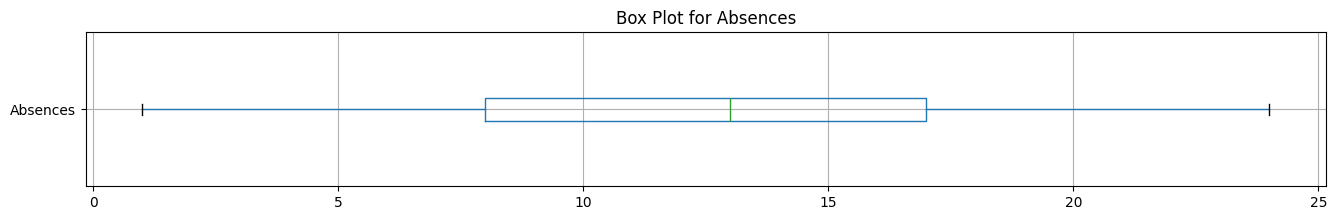

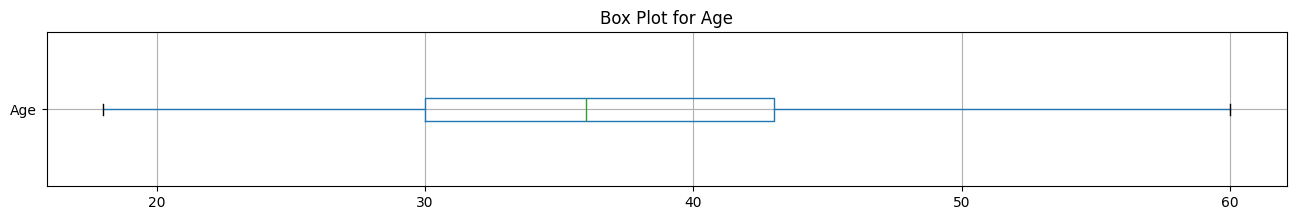

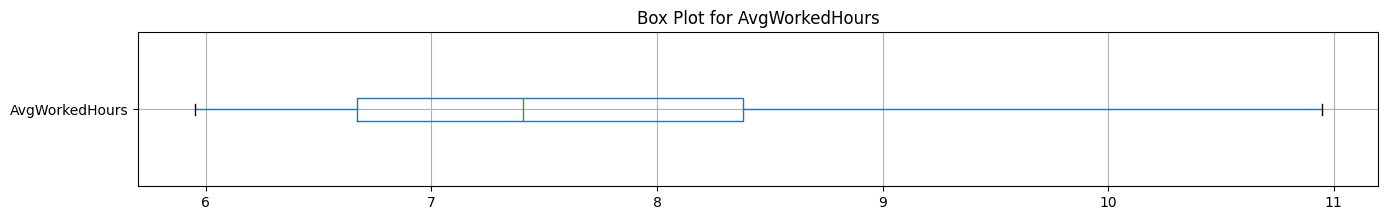

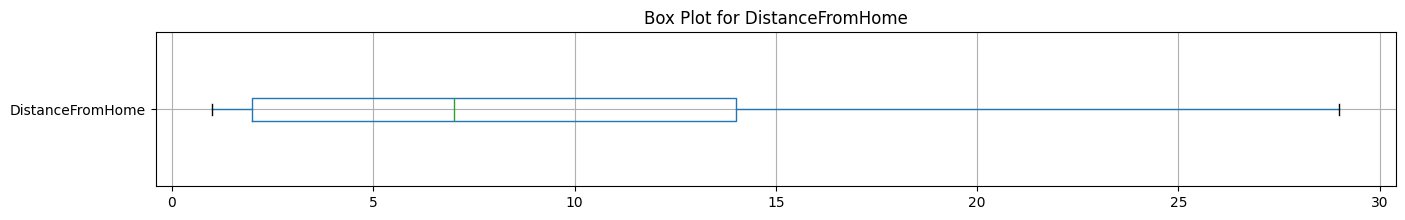

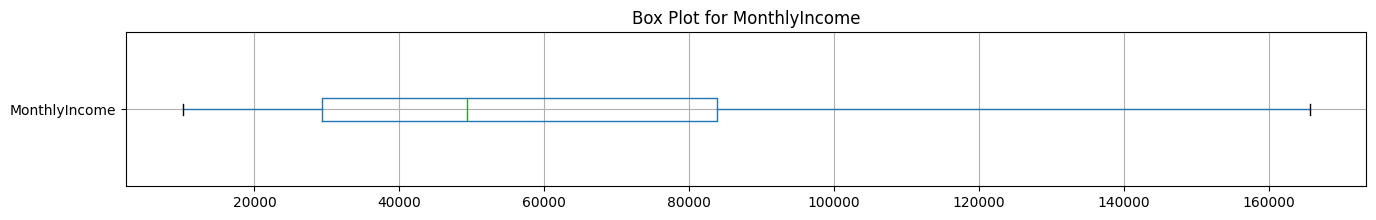

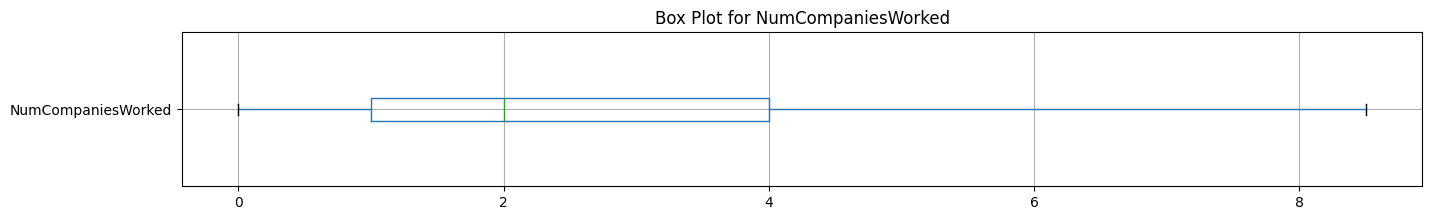

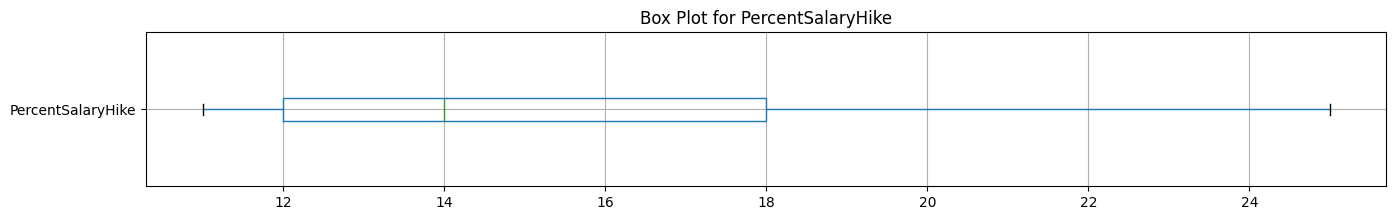

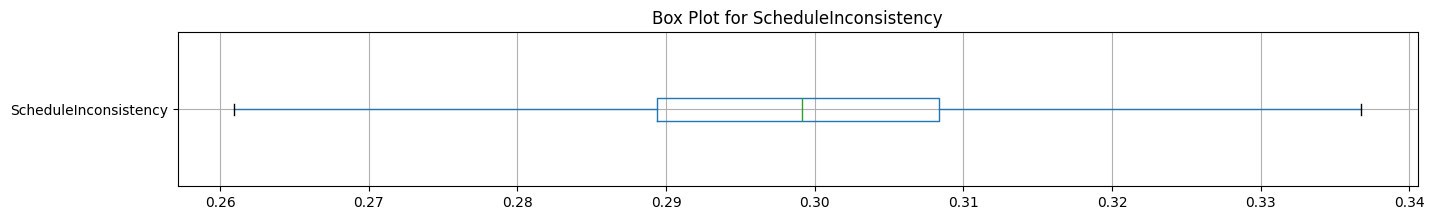

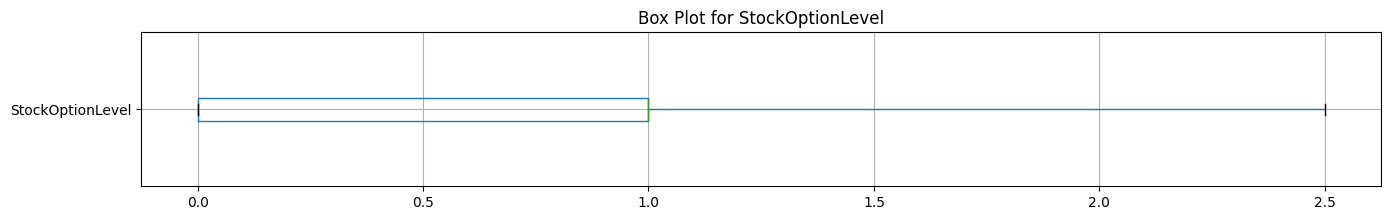

Categorical attributes are excluded from this treatment.
Categorical features ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobLevel', 'JobRole', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

With a threshold value of 1.5 , the outliers detected are:

No outliers in ['Absences', 'Age', 'AvgWorkedHours', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'ScheduleInconsistency', 'StockOptionLevel']


In [1756]:
DisplayOutliers(numerical_attributes,categorical_attributes)

The outliers had been correctly handled.

___
### 13. Treatment of categorical values

To prepare the dataset for analysis, we convert categorical attributes into numerical values.  

The method depends on the type of attribute:  

1. **OrdinalEncoder**:  
   - For attributes with a meaningful order (e.g., satisfaction levels).  

2. **OneHotEncoder**:  
   - For unordered categories, creating separate columns for each value.  

3. **LabelEncoder**:  
   - For target variables, assigning a unique integer to each category.  

Attributes like PerformanceRating, JobSatisfaction, and WorkLifeBalance already have numerical representations and don’t require further encoding.

In [1757]:
def EncodeDataLabel(attribute,encoder):
    merged_df[attribute] = encoder.fit_transform(merged_df[attribute])
    
def EncodeDataOrdinal(attribute,encoder):
    merged_df[attribute] = encoder.fit_transform(merged_df[[attribute]])

def EncodeDataOneHot(attribute,onehot_encoder):
    global merged_df
    encoded_data = onehot_encoder.fit_transform(merged_df[[attribute]])
    encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([attribute]),index=merged_df.index  # preserve the original index
    )
    merged_df = merged_df.drop(attribute, axis=1)
    merged_df = merged_df.join(encoded_df)


In [1758]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# 1. Encode 'Attrition' with LabelEncoder (binary classification)

label_encoder = LabelEncoder()
EncodeDataLabel('Attrition',label_encoder)

# 2. Encode with OrdinalEncoder (with custom order)

business_travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
years_order = ['[0-2]', '[3-9]', '[10-14]', '[15-19]', '[20-41]']
training_days_order = ['0 days', '1-2 days', '3-4 days', '5+ days']

ordinal_encoder = OrdinalEncoder(categories=[business_travel_order])
EncodeDataOrdinal('BusinessTravel',ordinal_encoder)
ordinal_encoder = OrdinalEncoder(categories=[training_days_order])
EncodeDataOrdinal('TrainingTimesLastYear',ordinal_encoder)
ordinal_encoder = OrdinalEncoder(categories=[years_order])
EncodeDataOrdinal('TotalWorkingYears',ordinal_encoder)
EncodeDataOrdinal('YearsAtCompany',ordinal_encoder)
EncodeDataOrdinal('YearsSinceLastPromotion',ordinal_encoder)
EncodeDataOrdinal('YearsWithCurrManager',ordinal_encoder)

# 3. Encode with OneHotEncoder (no order)

onehot_encoder = OneHotEncoder(sparse_output=False)
EncodeDataOneHot('Department',onehot_encoder)
EncodeDataOneHot('EducationField',onehot_encoder)
EncodeDataOneHot('JobRole',onehot_encoder)


In [1759]:
# Convert all columns to numeric where possible
for col in merged_df.columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

print(merged_df.dtypes)

Attrition                              int64
Age                                    int64
BusinessTravel                       float64
DistanceFromHome                       int64
Education                              int64
JobLevel                               int64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
WorkLifeBalance                      float64
JobInvolvement                         int64
PerformanceRating                      int64
AvgWorkedHours                       float64
ScheduleInconsistency                float64
Absences  

In [1760]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4327 entries, 0 to 4408
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4327 non-null   int64  
 1   Age                                4327 non-null   int64  
 2   BusinessTravel                     4327 non-null   float64
 3   DistanceFromHome                   4327 non-null   int64  
 4   Education                          4327 non-null   int64  
 5   JobLevel                           4327 non-null   int64  
 6   MonthlyIncome                      4327 non-null   float64
 7   NumCompaniesWorked                 4327 non-null   float64
 8   PercentSalaryHike                  4327 non-null   int64  
 9   StockOptionLevel                   4327 non-null   float64
 10  TotalWorkingYears                  4327 non-null   float64
 11  TrainingTimesLastYear              4327 non-null   float64
 1

With all features now converted to numerical form, we can proceed with feature selection.

Encoding is a crucial first step, as methods like the Chi-Square Test require numerical data to evaluate statistical relevance. Without encoding, the data wouldn’t meet these requirements.

___
### 14. Feature Selection

To get meaningful results, we need to focus on features that truly impact employee turnover (attrition). Processing all 39 columns in the dataset is impractical due to computational cost and the potential for overfitting.

To identify the most relevant features, we use:  
1. **Chi-Square Test**: Determines significant relationships between categorical features (e.g., BusinessTravel, Department) and attrition.  
2. **F-Test**: Evaluates the individual impact of numerical features (e.g., Age, Salary) on attrition.  
3. **RandomForestClassifier Built-In Function**: Measures the importance of each feature based on its contribution to predictive accuracy in a Random Forest model.


In [1761]:
merged_df.info()

Dataframe_numerical = merged_df[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','AvgWorkedHours']]
Dataframe_categorical = merged_df[['Attrition', 'BusinessTravel', 'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]
Dataframe_categorical_2 = merged_df[['BusinessTravel', 'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]

<class 'pandas.core.frame.DataFrame'>
Index: 4327 entries, 0 to 4408
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4327 non-null   int64  
 1   Age                                4327 non-null   int64  
 2   BusinessTravel                     4327 non-null   float64
 3   DistanceFromHome                   4327 non-null   int64  
 4   Education                          4327 non-null   int64  
 5   JobLevel                           4327 non-null   int64  
 6   MonthlyIncome                      4327 non-null   float64
 7   NumCompaniesWorked                 4327 non-null   float64
 8   PercentSalaryHike                  4327 non-null   int64  
 9   StockOptionLevel                   4327 non-null   float64
 10  TotalWorkingYears                  4327 non-null   float64
 11  TrainingTimesLastYear              4327 non-null   float64
 1

In [1762]:
DisplayMissingValues(merged_df,"merged")

[0] No missing values in: merged 



After preprocessing and encoding, we perform the Chi-Square test again to ensure the results reflect the cleaned and updated dataset. This step helps refine feature selection, confirming the most significant categorical attributes impacting attrition.

In [1763]:
from sklearn.feature_selection import SelectKBest, chi2

# Fit SelectKBest
selector = SelectKBest(chi2, k=10)
selector.fit(Dataframe_categorical_2, merged_df[['Attrition']])

# Get scores, p-values, and feature names
feature_scores = selector.scores_
feature_pvalues = selector.pvalues_
feature_names = Dataframe_categorical_2.columns

# Create a DataFrame for better visualization
score_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores,
    'p-Value': feature_pvalues
})

# Sort by score in descending order
score_df = score_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Filter for irrelevant features (e.g., p-value >= 0.05)
irrelevant_features = score_df[score_df['p-Value'] >= 0.05]
irrelevant_feature_names = irrelevant_features['Feature'].tolist()
# Display the results
print("Irrelevant Features Identified by Chi-Square Test:")
display(irrelevant_features)
print(irrelevant_feature_names)


Irrelevant Features Identified by Chi-Square Test:


,Feature,Score,p-Value
6,JobRole_Research Scientist,3.142776,0.076264
7,WorkLifeBalance,2.751546,0.097160
8,EducationField_Other,2.343187,0.125832
9,JobRole_Manager,2.263666,0.132440
10,Department_Sales,1.266709,0.260385
11,JobRole_Human Resources,0.745873,0.387786
12,JobLevel,0.397943,0.528154
13,JobRole_Sales Representative,0.376059,0.539720
14,JobRole_Sales Executive,0.338262,0.560834
15,EducationField_Life Sciences,0.332096,0.564427


['JobRole_Research Scientist', 'WorkLifeBalance', 'EducationField_Other', 'JobRole_Manager', 'Department_Sales', 'JobRole_Human Resources', 'JobLevel', 'JobRole_Sales Representative', 'JobRole_Sales Executive', 'EducationField_Life Sciences', 'Department_Research & Development', 'Education', 'JobInvolvement', 'PerformanceRating', 'EducationField_Marketing', 'JobRole_Laboratory Technician', 'EducationField_Medical']


In [1764]:
candidates_for_exclusion

['PerformanceRating',
 'JobLevel',
 'Education',
 'ScheduleInconsistency',
 'YearsSinceLastPromotion',
 'PercentSalaryHike',
 'MonthlyIncome',
 'Absences']

Before and after data cleaning, some features consistently showed little relevance to predicting attrition. For example, attributes like _PerformanceRating_ and _JobLevel_ were identified as irrelevant in both analyses, while others, such as _WorkLifeBalance_, emerged after cleaning.

This consistency validates our initial findings and highlights new candidates for deletion, particularly categorical attributes. Removing these irrelevant features can streamline the dataset and improve model efficiency without impacting accuracy.

In [1765]:
candidates_for_exclusion.extend(['JobRole','WorkLifeBalance','EducationField'])
candidates_for_exclusion

['PerformanceRating',
 'JobLevel',
 'Education',
 'ScheduleInconsistency',
 'YearsSinceLastPromotion',
 'PercentSalaryHike',
 'MonthlyIncome',
 'Absences',
 'JobRole',
 'WorkLifeBalance',
 'EducationField']

In [1766]:
from sklearn.feature_selection import f_classif

X = Dataframe_numerical  
y = merged_df['Attrition']  


relevant_f_classif = {}
non_relevant_f_classif = []

for column in X.columns:  
    f_statistic, p_value = f_classif(X[[column]], y)  

    # Output F-statistic and p-value
    print(f"Feature: {column}")
    print(f"F-statistic: {f_statistic[0]}")
    print(f"P-value: {p_value[0]}")

    alpha = 0.05  # Significance level
    if p_value[0] < alpha:
        print(f"Reject the null hypothesis: {column} has a significant effect on Attrition.")
        relevant_f_classif[column] = 1 - p_value
    else:
        print(f"Fail to reject the null hypothesis: {column} does not have a significant effect on Attrition.")
        non_relevant_f_classif.append(column)
    print("------")

print(relevant_f_classif)


Feature: Age
F-statistic: 108.43511027358882
P-value: 4.263225983514033e-25
Reject the null hypothesis: Age has a significant effect on Attrition.
------
Feature: DistanceFromHome
F-statistic: 0.30349113382599496
P-value: 0.5817304808523266
Fail to reject the null hypothesis: DistanceFromHome does not have a significant effect on Attrition.
------
Feature: MonthlyIncome
F-statistic: 4.918665107395418
P-value: 0.026619807621669274
Reject the null hypothesis: MonthlyIncome has a significant effect on Attrition.
------
Feature: NumCompaniesWorked
F-statistic: 8.186474125730275
P-value: 0.004240637513726142
Reject the null hypothesis: NumCompaniesWorked has a significant effect on Attrition.
------
Feature: PercentSalaryHike
F-statistic: 4.917983134333711
P-value: 0.026630305537838902
Reject the null hypothesis: PercentSalaryHike has a significant effect on Attrition.
------
Feature: StockOptionLevel
F-statistic: 0.16912436867140898
P-value: 0.6809115601485164
Fail to reject the null hypot

In [1767]:
candidates_for_exclusion

['PerformanceRating',
 'JobLevel',
 'Education',
 'ScheduleInconsistency',
 'YearsSinceLastPromotion',
 'PercentSalaryHike',
 'MonthlyIncome',
 'Absences',
 'JobRole',
 'WorkLifeBalance',
 'EducationField']

No new information introduced by this analysis.

In [1768]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the RandomForestClassifier
X = Dataframe_numerical
y = merged_df['Attrition']
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Combine feature names with their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Define the importance threshold
importance_threshold = 0.1

# Filter and store relevant attributes and their importances as a dictionary
relevant_rfc = dict(zip(
    importance_df[importance_df['Importance'] > importance_threshold]['Feature'],
    importance_df[importance_df['Importance'] > importance_threshold]['Importance']
))

# Display the relevant attributes and their scores
print("Relevant features and their importances:")
print(relevant_rfc)

# Display the complete DataFrame for reference
print("All feature importances:")
print(importance_df)


Relevant features and their importances:
{'AvgWorkedHours': 0.19545560062106015, 'Age': 0.1477152072361557, 'MonthlyIncome': 0.1472835728858602, 'DistanceFromHome': 0.10446404247709903}
All feature importances:
                    Feature  Importance
11           AvgWorkedHours    0.195456
0                       Age    0.147715
2             MonthlyIncome    0.147284
1          DistanceFromHome    0.104464
4         PercentSalaryHike    0.093429
3        NumCompaniesWorked    0.073850
6         TotalWorkingYears    0.061015
5          StockOptionLevel    0.046992
8            YearsAtCompany    0.040252
7     TrainingTimesLastYear    0.032831
9   YearsSinceLastPromotion    0.028657
10     YearsWithCurrManager    0.028056


In [1769]:
candidates_for_training

['AvgWorkedHours', 'YearsWithCurrManager', 'TotalWorkingYears']

Initially, the candidates for training were _['AvgWorkedHours', 'YearsWithCurrManager', 'TotalWorkingYears']_. However, after analyzing feature importance using the Random Forest method, additional attributes were identified as highly relevant, including **Age**, **MonthlyIncome**, **DistanceFromHome**, and **PercentSalaryHike**.

The final list of candidates for training now includes:  
- **AvgWorkedHours**: A strong predictor of workload and burnout.  
- **YearsWithCurrManager**: Reflects stability and relationships at work.  
- **TotalWorkingYears**: Indicates overall experience.  
- **Age**: A demographic factor that may influence career stage and decisions.  
- **MonthlyIncome**: Represents financial stability.  
- **DistanceFromHome**: Impacts work-life balance.  
- **PercentSalaryHike**: Highlights financial motivation.

This expanded list provides a more comprehensive view of the factors likely to affect employee attrition.

# 15. PREDICTING ATTRITION

We drop all the attributes that are not useful for this analysis.

In [1786]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Get all attributes from the DataFrame
all_attributes = list(merged_df.columns)

# Identify remaining attributes to use
remaining_attributes = [attr for attr in all_attributes if attr in candidates_for_training]

# Select only the desired columns for X
X = merged_df[remaining_attributes]
X = merged_df.drop(columns='Attrition')

# Target variable
y = merged_df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (3461, 40), Testing set: (866, 40)


In [1787]:
from pandas.plotting import scatter_matrix 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.svm import SVC

results = {}

In [1788]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, 
                             mean_absolute_error, mean_squared_error, roc_curve)
from sklearn.model_selection import learning_curve, cross_val_score

model_results = {}

def TestModel(model,model_name='Unknown',graphs=['stats']):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    model_results[model_name] = [accuracy,precision,recall,f1,mae,mse,rmse,roc_auc]
    if 'stats' in graphs:
        print("Accuracy:    ", accuracy)
        print("Precision:   ", precision)
        print("Recall:      ", recall)
        print("F1 Score:    ", f1)
        print("MAE:         ", mae)
        print("MSE:         ", mse)
        print("RMSE:        ", rmse)
        print("ROC AUC:     ", roc_auc)

    # Confusion Matrix
    if 'confusion_matrix' in graphs:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap="Blues")
        plt.title("Confusion Matrix")
        plt.show()

    if 'roc_curve' in graphs:
        # ROC Curve (Only for binary classification)
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate (Recall)")
            plt.title("ROC Curve")
            plt.legend()
            plt.show()

    # Cross-Validation
    if 'cross_validation' in graphs:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        print("Cross-Validation Scores:", cv_scores)
        print("Mean CV Accuracy:", np.mean(cv_scores))

    # Learning Curve
    if 'learning_curve' in graphs:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        plt.figure(figsize=(8, 5))
        plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
        plt.plot(train_sizes, test_mean, label="Validation Score", color="red")
        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy Score")
        plt.title("Learning Curve")
        plt.legend()
        plt.show()

    # Feature Importance
    if 'feature_importance' in graphs:
        if hasattr(model, "feature_importances_"):
            feature_importance = model.feature_importances_
            plt.figure(figsize=(8, 5))
            plt.barh(range(len(feature_importance)), feature_importance, align="center")
            plt.xlabel("Feature Importance")
            plt.ylabel("Feature Index")
            plt.title("Feature Importance in Model")
            plt.show()

    return [accuracy, mse, rmse, mae, precision, recall, f1, roc_auc]


##### Logistic Regression Classifier

Accuracy:     0.8556581986143187
Precision:    0.8612408619701679
Recall:       0.8556581986143187
F1 Score:     0.8062872970276342
MAE:          0.14434180138568128
MSE:          0.14434180138568128
RMSE:         0.37992341515847805
ROC AUC:      0.791017316017316


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


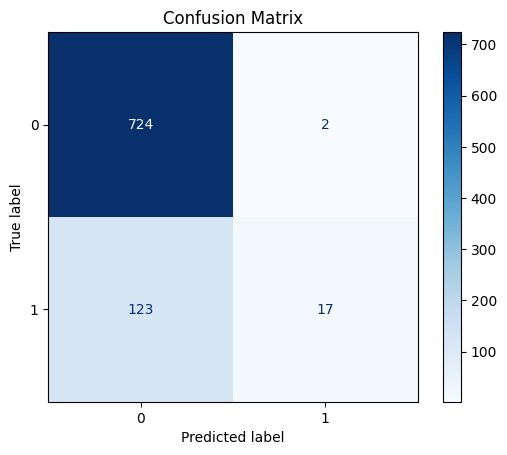

In [1789]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)
results['LogisticRegression'] = TestModel(log_reg,'logistic regression',['confusion_matrix','stats'])

##### Support Vector Classifier

Accuracy:     0.8383371824480369
Precision:    0.7028092314749131
Recall:       0.8383371824480369
F1 Score:     0.7646140633885362
MAE:          0.16166281755196305
MSE:          0.16166281755196305
RMSE:         0.4020731495038721
ROC AUC:      N/A


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


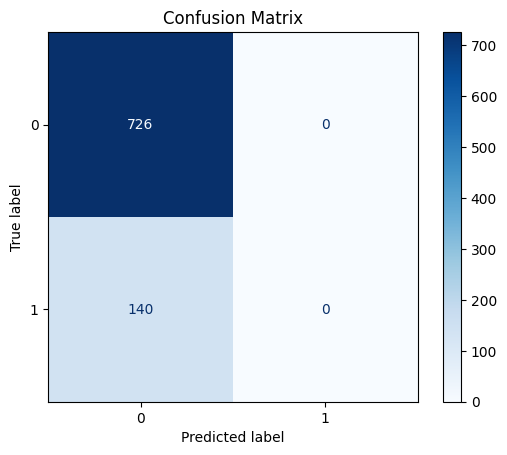

In [1790]:
svc = SVC(random_state=42)
results['SVC'] = TestModel(svc,'SVC',['confusion_matrix','stats'])


**Zero predictions for positive Attrition?**
- The SVC model shows poor performance due to data imbalance, consistently predicting the majority class (False) while neglecting the minority class (True). 
- While the accuracy appears high, this is misleading, as the confusion matrix clearly shows the model's failure to correctly predict the minority class, showing its unreliability.
- SVMs are sensitive to imbalanced data because the cost function optimizes for overall accuracy. To counter this, we will try to use the class_weight='balanced' option in our SVC model, which adjusts the weights inversely proportional to class frequencies.

Accuracy:     0.3371824480369515
Precision:    0.7439222675247052
Recall:       0.3371824480369515
F1 Score:     0.3709144910854901
MAE:          0.6628175519630485
MSE:          0.6628175519630485
RMSE:         0.8141360770553339
ROC AUC:      N/A


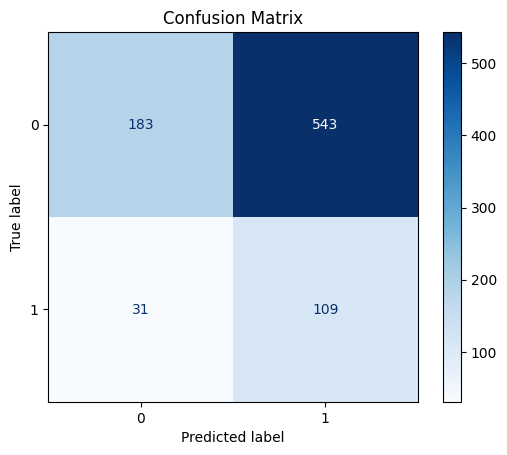

In [1791]:
svc = SVC(class_weight='balanced',random_state=42)
results['SVC'] = TestModel(svc,'SVC',['confusion_matrix','stats'])

The results are even worse! Maybe it's time for us to admit that SVC is not a good model for this analysis. While SVCs are powerful for balanced datasets with clear margins, they are not ideal for highly imbalanced data like our case, where most cases are negative for Attrition.

##### Decision Tree Classifier

In [1792]:
dtree = DecisionTreeClassifier()
results['DecisionTree'] = TestModel(dtree)

Accuracy:     0.9711316397228638
Precision:    0.972201417121873
Recall:       0.9711316397228638
F1 Score:     0.9714911209912689
MAE:          0.028868360277136258
MSE:          0.028868360277136258
RMSE:         0.1699069165076462
ROC AUC:      0.9597205824478552


In [1793]:
rf = RandomForestClassifier()
results['RandomForest'] = TestModel(rf)

Accuracy:     0.9815242494226328
Precision:    0.9813837458802687
Recall:       0.9815242494226328
F1 Score:     0.9814157459503378
MAE:          0.018475750577367205
MSE:          0.018475750577367205
RMSE:         0.13592553320611697
ROC AUC:      0.9981601731601731


In [1794]:
knn = KNeighborsClassifier()
results['KNN'] = TestModel(knn)

Accuracy:     0.8060046189376443
Precision:    0.785187925856399
Recall:       0.8060046189376443
F1 Score:     0.7940402025884126
MAE:          0.19399538106235567
MSE:          0.19399538106235567
RMSE:         0.4404490675008356
ROC AUC:      0.8647727272727272


In [1795]:
results

{'LogisticRegression': [0.8556581986143187,
  0.14434180138568128,
  0.37992341515847805,
  0.14434180138568128,
  0.8612408619701679,
  0.8556581986143187,
  0.8062872970276342,
  0.791017316017316],
 'SVC': [0.3371824480369515,
  0.6628175519630485,
  0.8141360770553339,
  0.6628175519630485,
  0.7439222675247052,
  0.3371824480369515,
  0.3709144910854901,
  'N/A'],
 'DecisionTree': [0.9711316397228638,
  0.028868360277136258,
  0.1699069165076462,
  0.028868360277136258,
  0.972201417121873,
  0.9711316397228638,
  0.9714911209912689,
  0.9597205824478552],
 'RandomForest': [0.9815242494226328,
  0.018475750577367205,
  0.13592553320611697,
  0.018475750577367205,
  0.9813837458802687,
  0.9815242494226328,
  0.9814157459503378,
  0.9981601731601731],
 'KNN': [0.8060046189376443,
  0.19399538106235567,
  0.4404490675008356,
  0.19399538106235567,
  0.785187925856399,
  0.8060046189376443,
  0.7940402025884126,
  0.8647727272727272]}

## 17. Scaling


In [1796]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler instance
scaler = MinMaxScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do NOT fit again)
X_test = scaler.transform(X_test)

Training SVC
Accuracy:     0.8926096997690531
MAE:          0.10739030023094688
MSE:          0.10739030023094688
RMSE:         0.32770459293538573
Training DecisionTree
Accuracy:     0.9630484988452656
MAE:          0.03695150115473441
MSE:          0.03695150115473441
RMSE:         0.19222773253288508
Training RandomForest
Accuracy:     0.9826789838337182
MAE:          0.017321016166281754
MSE:          0.017321016166281754
RMSE:         0.13160933160791355
Training KNN
Accuracy:     0.8579676674364896
MAE:          0.1420323325635104
MSE:          0.1420323325635104
RMSE:         0.37687177204390143

The best model is 'RandomForest' with an accuracy of 0.9827


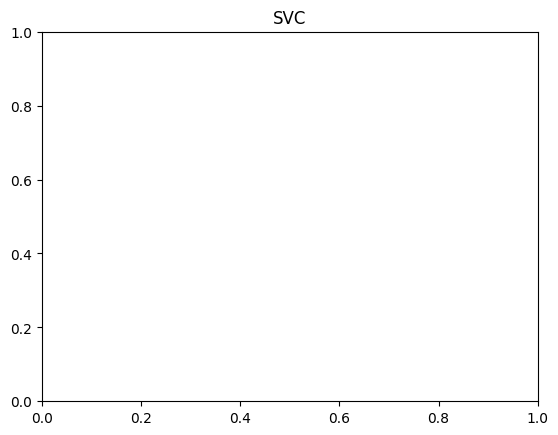

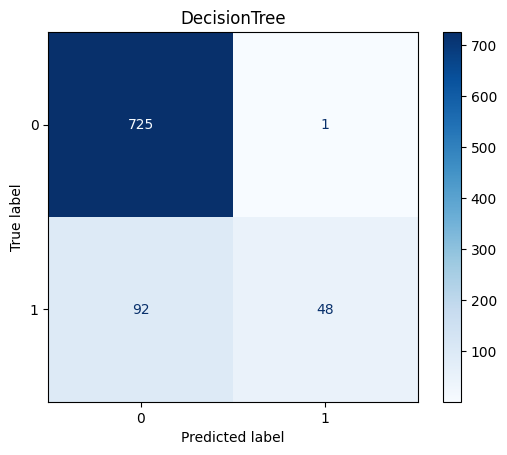

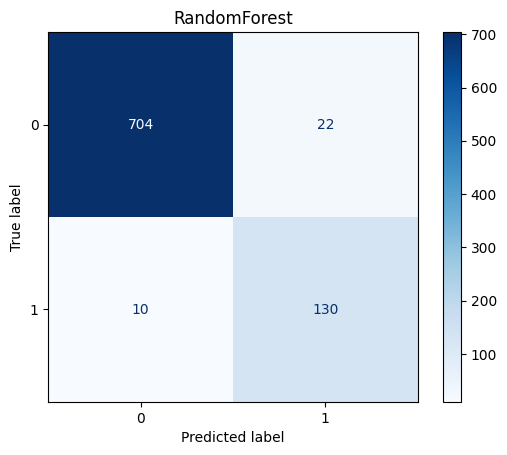

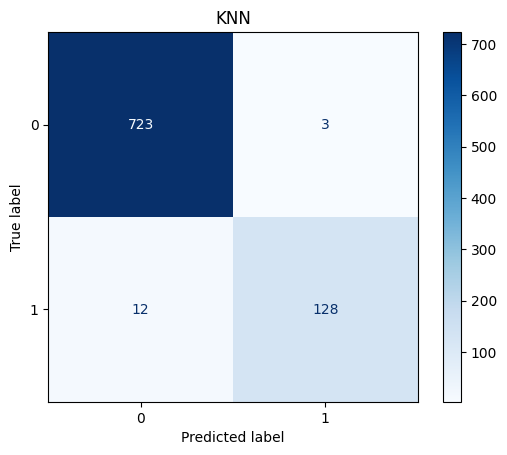

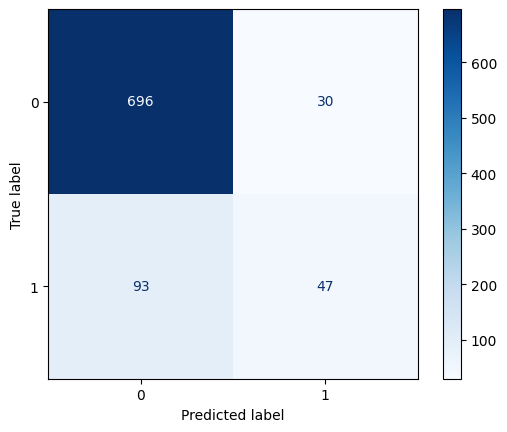

In [1797]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



def TestModel(model,title):

    print("Training",title)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print("Accuracy:    ", accuracy)
    print("MAE:         ", mae)
    print("MSE:         ", mse)
    print("RMSE:        ", rmse)
    
    plt.title(title)
    # Compute and display confusion matrix
    if title == 'LogisticRegression':
        print(y_test)
        print(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues",)
    
    return [accuracy, mse, rmse, mae]

# Initialize the results dictionary
results = {}

# Test each model
#log_reg = LogisticRegression(max_iter=100, random_state=42)
#results['LogisticRegression'] = TestModel(log_reg,'LogisticRegression')

svc = SVC()
results['SVC'] = TestModel(svc,'SVC')

dtree = DecisionTreeClassifier()
results['DecisionTree'] = TestModel(dtree,'DecisionTree')

rf = RandomForestClassifier()
results['RandomForest'] = TestModel(rf,'RandomForest')

knn = KNeighborsClassifier()
results['KNN'] = TestModel(knn,'KNN')

# Select the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x][0])
best_accuracy = results[best_model_name][0]

# Print the result
print(f"\nThe best model is '{best_model_name}' with an accuracy of {best_accuracy:.4f}")

# 18. Fine Tuned Random Forest Model

Training Random Forest Estimator
Accuracy:     0.9884526558891455
MAE:          0.011547344110854504
MSE:          0.011547344110854504
RMSE:         0.10745856927604473
Fine-tuned Random Forest accuracy: 0.9885


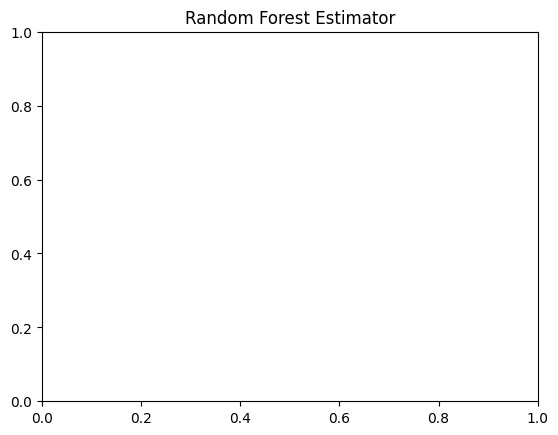

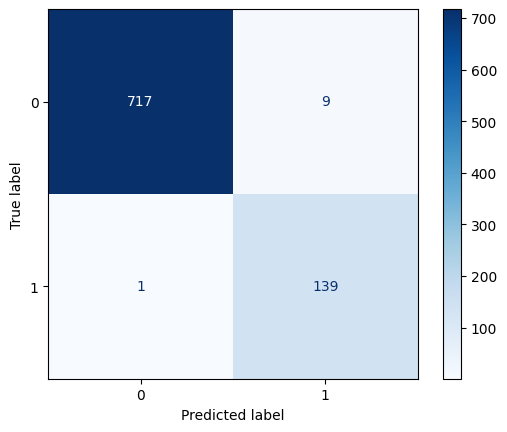

In [1798]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Fine-tune Random Forest if it's the best model
if best_model_name == 'RandomForest':
    param_grid = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', 0.5],
        'bootstrap': [True, False]
    }
    
    rf = RandomForestClassifier()
    random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    
    # Test the fine-tuned model
    best_rf = random_search.best_estimator_
    best_settings = random_search.best_params_
    #print("Best settings:", best_settings)
    results['FineTunedRandomForest'] = TestModel(best_rf, 'Random Forest Estimator')
    print(f"Fine-tuned Random Forest accuracy: {results['FineTunedRandomForest'][0]:.4f}")

# Conclusion  

After testing multiple models to predict employee attrition, the **Random Forest Classifier** emerged as the most effective. With fine-tuning, it achieved an accuracy of **98.85%**, outperforming other models such as:  

- **SVC**: 89.26% accuracy  
- **Decision Tree**: 96.30% accuracy  
- **KNN**: 85.80% accuracy  

The Random Forest model also recorded the lowest error metrics, including **MAE (0.0115)** and **RMSE (0.1075)**, making it highly reliable for attrition prediction.  

**Key Features Impacting Attrition**

The most significant predictors of attrition identified are:  
- **AvgWorkedHours**  
- **YearsWithCurrManager**  
- **TotalWorkingYears**  
- **Age**  
- **MonthlyIncome**  
- **DistanceFromHome**  

These features highlight the critical factors influencing employee decisions to stay or leave, including workload, manager relationships, career progression, financial stability, and work-life balance.  

By focusing on these areas and utilizing the fine-tuned Random Forest model, **HumanForYou** can take precise, data-driven actions to reduce employee turnover.

# 19. Bibliography

1. Python Data Science Handbook, by Jake VanderPlas

2. Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32.
This paper introduces the Random Forest algorithm, a widely used machine learning technique for classification and regression tasks.

3. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
This article describes scikit-learn, a popular Python library for machine learning, detailing its implementation and capabilities.

4. Ioannidis, A., et al. (2023). BabbleNewt: A Simplified, Consistent, and Interoperable Reference Citation Format for Bibliographic Metadata.

5. Basics Statistics For DataScience M. A. BENATIA, DEC 2020

6. INTRO TO MACHINE LEARNING (ML) M. A. BENATIA, DEC 2020

7. Documentation Scikit-Learn : Regression Logistique

8. Documentation Scikit-Learn : Perceptron

9. Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267-288.

10. Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Biased Estimation for Nonorthogonal Problems. Technometrics, 12(1), 55-67.

